In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback
import warnings
# warnings.simplefilter("ignore")
silence_warnings()
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


18:15:25 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=347249;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=573093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


18:15:26 INFO      Starting 3ML!                                                                     ]8;id=884696;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=693077;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=276388;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=231835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=975448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=45786;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=252170;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=445134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

18:15:27 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=732287;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=908324;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=449780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=498036;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=105120;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=487382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

18:15:27 WARNING   No fermitools installed                                              ]8;id=964774;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=505613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/37 [00:00<00:00, 348.33it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.


WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  59%|█████▉    | 22/37 [00:00<00:00, 35.26it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 35.26it/s]   

Yourlib init successfully!!!


18:15:47 INFO      Creating singleton for                                                            ]8;id=445397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=22015;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#41\41]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.roo               
                  t                                                                                                

Load sub from Myspeedup: 100%|██████████| 37/37 [00:20<00:00, 35.26it/s]

18:15:51 INFO      Region of Interest:                                                                   ]8;id=851571;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=13556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=490164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=645595;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (274.466, -15.903), model radius:     ]8;id=177153;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=744659;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=810096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=823051;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=982720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=558531;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=491350;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=318447;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 140 x 140 px                                                           ]8;id=13166;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=723068;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=649841;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=139467;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=802908;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=922314;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=793737;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=8060;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=486190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=279632;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=805295;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=706017;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=163796;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=723230;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=874998;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=191397;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=643112;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=387122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=646298;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=367507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=613123;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=544682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme     Obs counts     Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  899087.600703  887010.758362  1.013615          27885  \
1   1   1024   RING  503766.474199  492681.862829  1.022499          27885   
2   2   1024   RING   87507.062503   84032.034638  1.041354          27885   
3   3   1024   RING   33084.489118   31305.470350  1.056828          27885   
4   4   1024   RING    7240.836345    6683.045606  1.083464          27885   
5   5   1024   RING    2301.727917    1901.459867  1.210506          27885   

   Area (deg^2)  
0     91.420716  
1     91.420716  
2     91.420716  
3     91.420716  
4     91.420716  
5     91.420716

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=416241;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=281711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.68 Mb                                                         ]8;id=234083;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=797760;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=467210;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=191177;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=819679;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=950736;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=781076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=370372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=56328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=945735;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:15:52 INFO      J1809M1918u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=656329;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=875466;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=422090;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=480110;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.46e-13 kb=(1.00e-15, 1.26e-12) index=-2.24 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=609681;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=944451;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.35 sb=(0.00,0.83) fitrange=1.60                                                         

         INFO      J1813M1245 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=687715;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=305844;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=584418;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=472392;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.44e-13 kb=(1.00e-15, 9.04e-13) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=1.68                                                                  ]8;id=614926;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=578237;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1814M1719u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=634954;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=568660;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=767919;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=408183;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.65e-12 kb=(1.00e-15, 6.34e-12) index=-2.83 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=886839;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=799140;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.71 sb=(0.15,1.27) fitrange=2.16                                                         

         INFO      J1825M1418 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=40019;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=942140;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=580549;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=986698;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.92e-12 kb=(4.70e-13, 7.37e-12) index=-2.98 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=670679;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=871280;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.81 sb=(0.41,1.21) fitrange=1.52                                                         

         INFO      J1825M1256u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=352576;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=82357;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=184917;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=548413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.27e-13 kb=(1.70e-14, 1.64e-12) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=336799;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=656389;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.48) fitrange=0.64                                                         

         INFO      J1825M1337u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=798043;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=572893;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=146069;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=227271;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.04e-12 kb=(2.00e-13, 1.88e-12) index=-2.55 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=486609;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=438559;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.17 sb=(0.01,0.33) fitrange=0.40                                                         

         INFO      J1831M1007u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=144128;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=229007;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=357965;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=591467;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.78e-12 kb=(1.90e-13, 3.37e-12) index=-2.71 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=771939;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=349799;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.78 sb=(0.46,1.10) fitrange=1.28                                                         

         INFO      Set diffuse range: [6, 22] [-8, 8]                                                 ]8;id=171502;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=725817;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=709682;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=163731;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (277.63954061628795, -27.557682624653204)                                          ]8;id=472304;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=540904;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (285.1111448645484, -13.332266152852325)                                           ]8;id=415201;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=621498;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (270.70021251634495, -5.950912756760416)                                           ]8;id=235455;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=413115;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (262.45685841291584, -19.61632769080187)                                           ]8;id=89473;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=7075;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=126806;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=413962;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.1405518522099322e-05                                                ]8;id=219858;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=362945;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.09000730127151274                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=310831;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=358543;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_fixpfixspecfm_dust_bkg_template.fits    ]8;id=615010;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=229618;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  7
Particle sources  0

Free parameters (2):
--------------------

                                     value min_value max_value            unit
Diffuse.spectrum.main.Powerlaw.K       0.0       0.0       0.0  keV-1 s-1 cm-2
Diffuse.spectrum.main.Powerlaw.index  -2.5      -4.5      -0.5                

Fixed parameters (45):
---------------------

                                                                                      value   
J1809M1918u.Gaussian_on_sphere.lon0                                                  272.66  \
J1809M1918u.Gaussian_on_sphere.lat0                                                  -19.32   
J1809M1918u.Gaussian_on_sphere.sigma                                                   0.35   
J1809M1918u.spectrum.main.Powerlaw.K                                                    0.0   
J1809M1918u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1809M1918u.spectrum.main.Powerlaw.index                                              -2.24   
J1813M1245.position.ra                                                               273.35   
J1813M1245.position.dec                                                              -12.73   
J1813M1245.spectrum.main.Powerlaw.K                                                     0.0   
J1813M1245.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1813M1245.spectrum.main.Powerlaw.index                                               -2.61   
J1814M1719u.Gaussian_on_sphere.lon0                                                  273.69   
J1814M1719u.Gaussian_on_sphere.lat0                                                  -17.33   
J1814M1719u.Gaussian_on_sphere.sigma                                                   0.71   
J1814M1719u.spectrum.main.Powerlaw.K                                                    0.0   
J1814M1719u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1814M1719u.spectrum.main.Powerlaw.index                                              -2.83   
J1825M1418.Gaussian_on_sphere.lon0                                                   276.29   
J1825M1418.Gaussian_on_sphere.lat0                                                   -14.32   
J1825M1418.Gaussian_on_sphere.sigma                                                    0.81   
J1825M1418.spectrum.main.Powerlaw.K                                                     0.0   
J1825M1418.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1825M1418.spectrum.main.Powerlaw.index                                               -2.98   
J1825M1256u.Gaussian_on_sphere.lon0                                                  276.55   
J1825M1256u.Gaussian_on_sphere.lat0                                                  -13.04   
J1825M1256u.Gaussian_on_sphere.sigma                                                   0.24   
J1825M1256u.spectrum.main.Powerlaw.K                                                    0.0   
J1825M1256u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1825M1256u.spectrum.main.Powerlaw.index                                              -2.61   
J1825M1337u.Gaussian_on_sphere.lon0                                                  276.55   
J1825M1337u.Gaussian_on_sphere.lat0                                                  -13.73   
J1825M1337u.Gaussian_on_sphere.sigma                                                   0.17   
J1825M1337u.spectrum.main.Powerlaw.K                                                    0.0   
J1825M1337u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1825M1337u.spectrum.main.Powerlaw.index                                              -2.55   
J1831M1007u.Gaussian_on_sphere.lon0                                                  277.75   
J1831M1007u.Gaussian_on_sphere.lat0           

18:15:54 INFO      Considering 5 dec bins for extended source J1809M1918u           ]8;id=935363;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=443935;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -19.320                     ]8;id=900032;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=822410;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1814M1719u           ]8;id=348328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=873406;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=869798;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=450485;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=428327;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=14218;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=436671;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=885737;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=496925;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=562946;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=911681;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=812480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=521020;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=973942;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=208303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=704584;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1831M1007u           ]8;id=275482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=810853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=765110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=657801;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source Diffuse              ]8;id=392105;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=668018;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -16.620                     ]8;id=84098;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=161385;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=632989;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=660466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=486195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=52801;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result             unit
parameter                                                                    
Diffuse.spectrum.main.Powerlaw.K      (1.3 -1.3 +4) x 10^-17  1 / (keV s cm2)
Diffuse.spectrum.main.Powerlaw.index                -3 +/- 9

Correlation matrix:

1.00 -0.68
-0.68  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        6893.658223
total       6893.658223

Values of statistical measures:

statistical measures
AIC          13791.316519
BIC          13811.371654

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:16:15 INFO      Considering 5 dec bins for extended source J1809M1918u           ]8;id=304740;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=864809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -19.320                     ]8;id=713095;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=408545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1814M1719u           ]8;id=735777;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -17.330                     ]8;id=779055;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=845780;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1825M1418            ]8;id=707311;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=211272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -14.320                     ]8;id=14755;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=340136;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=469272;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=88466;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=359225;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=912772;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1825M1337u           ]8;id=95084;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=716195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.730                     ]8;id=549919;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=98963;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1831M1007u           ]8;id=101925;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=569829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=118464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=934065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source Diffuse              ]8;id=155076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=840184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -16.620                     ]8;id=437750;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=666038;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(276.15234374999994, -12.062840673057096)


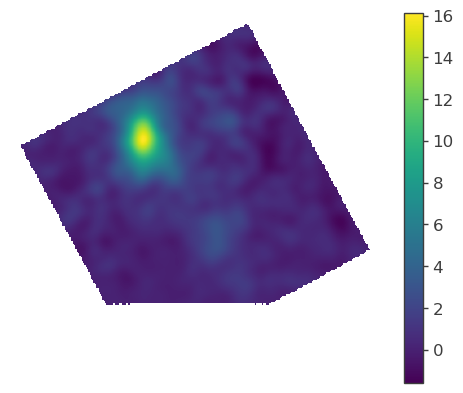

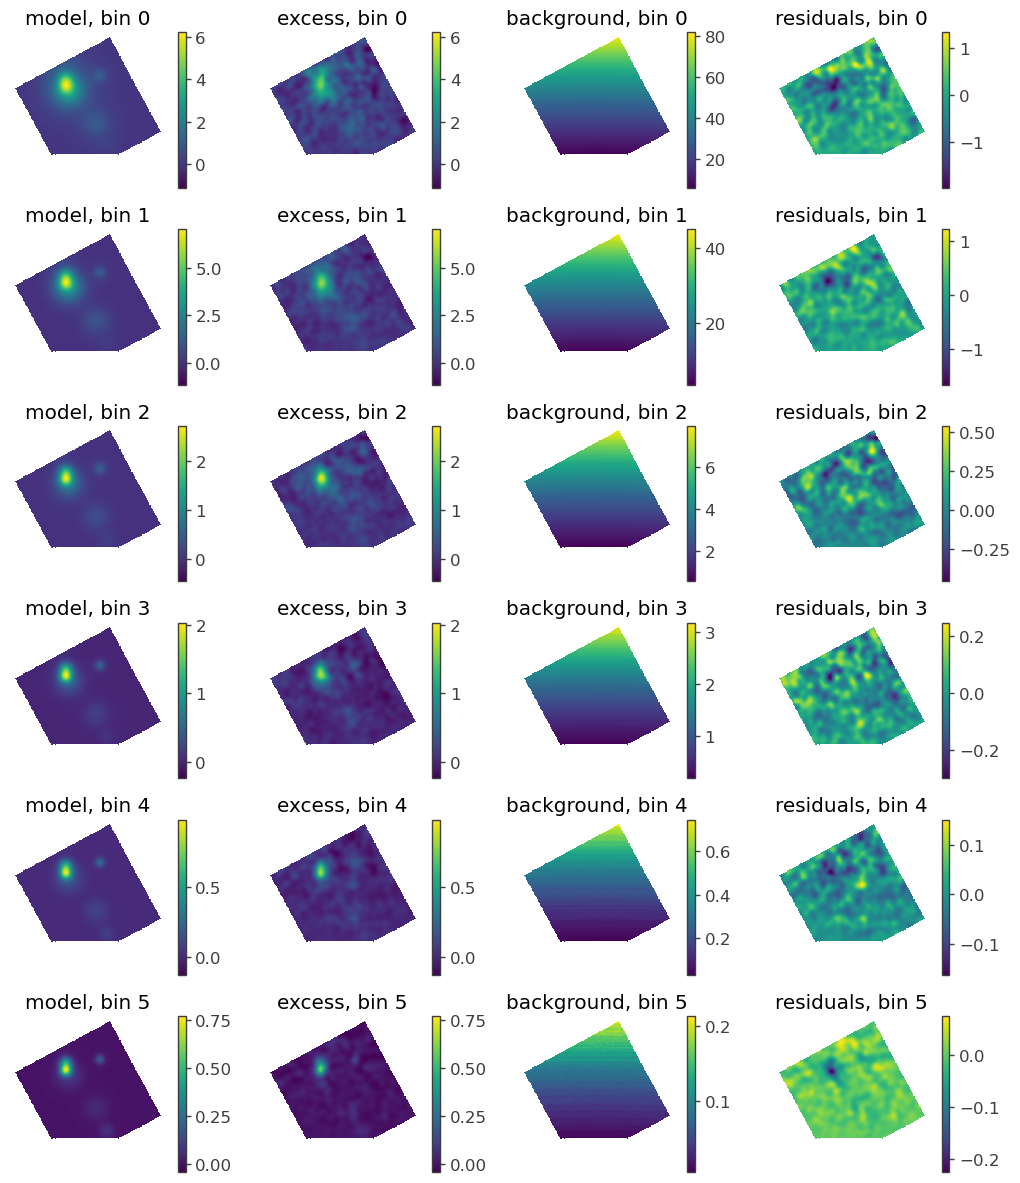

<Figure size 640x480 with 0 Axes>

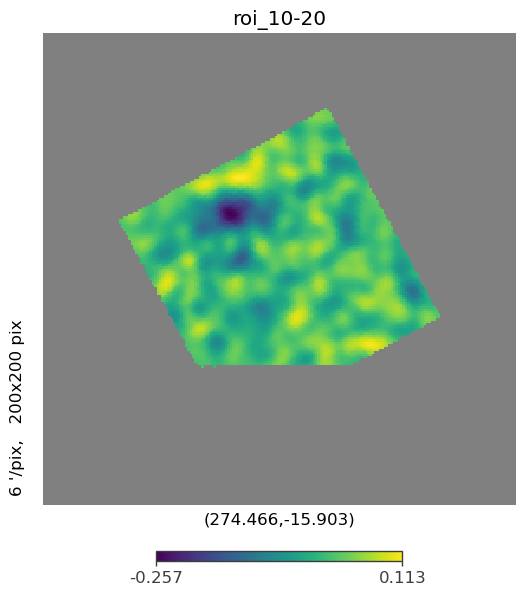

LHAASO:  1 272.38 -19.3  1LHAASO J1809-1918u  0.0
LHAASO:  2 272.66 -19.32  1LHAASO J1809-1918u   0.35
LHAASO:  3 273.36 -12.75  1LHAASO J1813-1245  0.0
LHAASO:  4 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  5 273.69 -17.33 1LHAASO J1814-1719u*  0.71
LHAASO:  6 273.27 -17.89 1LHAASO J1814-1719u*   0.0
LHAASO:  7 273.72 -16.62  1LHAASO J1814-1636u  0.68
LHAASO:  8 273.72 -16.62  1KM2A J1814-1636u  0
LHAASO:  9 276.29 -14.32 1LHAASO J1825-1418  0.81
LHAASO:  10 276.25 -14.0 1LHAASO J1825-1418   0.81
LHAASO:  11 276.44 -12.94  1LHAASO J1825-1256u  0.0
LHAASO:  12 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  13 276.45 -13.63  1LHAASO J1825-1337u  0.0
LHAASO:  14 276.55 -13.73  1LHAASO J1825-1337u   0.17
LHAASO:  15 277.75 -10.12 1LHAASO J1831-1007u*  0.78
LHAASO:  16 277.81 -9.83 1LHAASO J1831-1007u*   0.26
LHAASO:  17 277.84 -10.48  1LHAASO J1831-1028  0.94
LHAASO:  18 277.84 -10.48  1KM2A J1831-1028  0
TeVCat:  1 271.12999999999994 -21.7 HESS J1804-216 0.16
TeVCat:  2 272.1554

Best fit values:

result   
parameter                                                            
Diffuse.spectrum.main.PowerlawM.K  (-1.33544 +/- 0.00020) x 10^-21  \

                                              unit  
parameter                                           
Diffuse.spectrum.main.PowerlawM.K  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1303.206352
total       1303.206352

Values of statistical measures:

statistical measures
AIC           2608.412729
BIC           2618.440309

Best fit values:

result             unit
parameter                                                              
Diffuse.spectrum.main.PowerlawM.K  (9 +/- 10) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1269.226074
total       1269.226074

Values of statistical measures:

statistical measures
AIC           2540.452171
BIC           2550.479751

Best fit values:

result   
parameter                                                           
Diffuse.spectrum.main.PowerlawM.K  (1.33544 +/- 0.00008) x 10^-21  \

                                              unit  
parameter                                           
Diffuse.spectrum.main.PowerlawM.K  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         1229.18911
total        1229.18911

Values of statistical measures:

statistical measures
AIC           2460.378243
BIC           2470.405823

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.3 +/- 1.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1132.331743
total       1132.331743

Values of statistical measures:

statistical measures
AIC           2266.663509
BIC           2276.691089

Best fit values:

result   
parameter                                                              
Diffuse.spectrum.main.PowerlawM.K  (-1.335435 +/- 0.000010) x 10^-21  \

                                              unit  
parameter                                           
Diffuse.spectrum.main.PowerlawM.K  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         992.982225
total        992.982225

Values of statistical measures:

statistical measures
AIC           1987.964474
BIC           1997.992054

Best fit values:

result   
parameter                                                            
Diffuse.spectrum.main.PowerlawM.K  (-1.33544 +/- 0.00005) x 10^-21  \

                                              unit  
parameter                                           
Diffuse.spectrum.main.PowerlawM.K  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         953.248435
total        953.248435

Values of statistical measures:

statistical measures
AIC           1908.496895
BIC           1918.524474

100%|██████████| 6/6 [00:23<00:00,  3.86s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:18:09 INFO      Region of Interest:                                                                   ]8;id=954344;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=883050;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=70674;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=545384;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (279.224, -7.055), model radius:      ]8;id=931033;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=612556;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=504124;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=424725;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=82023;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=539960;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=412241;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=29155;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 140 x 140 px                                                           ]8;id=445638;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=265509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=299836;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=163534;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=13;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=83340;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=395327;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=739173;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=302277;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=306079;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=215051;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=631677;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=336968;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=743499;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=767145;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=55703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=451076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=475100;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=404387;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=846625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=301207;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=66472;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  3.332536e+06  3.291720e+06  1.012399          30462  \
1   1   1024   RING  1.844727e+06  1.805256e+06  1.021864          30462   
2   2   1024   RING  3.329679e+05  3.195947e+05  1.041844          30462   
3   3   1024   RING  1.383612e+05  1.293840e+05  1.069384          30462   
4   4   1024   RING  3.427138e+04  3.120261e+04  1.098350          30462   
5   5   1024   RING  1.002656e+04  8.726789e+03  1.148940          30462   

   Area (deg^2)  
0     99.869387  
1     99.869387  
2     99.869387  
3     99.869387  
4     99.869387  
5     99.869387

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=417648;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=219063;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=520065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=776091;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=319043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=769564;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=624966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=233303;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=874309;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=958756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=567696;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=908834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:18:10 INFO      J1825M1256u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=216852;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=651543;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=944507;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=773155;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.27e-13 kb=(1.70e-14, 1.64e-12) index=-2.61 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=594446;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=267124;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.48) fitrange=0.64                                                         

         INFO      J1831M1007u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=216292;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=421715;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=711290;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=304053;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.78e-12 kb=(1.90e-13, 3.37e-12) index=-2.71 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=614819;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=131394;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.78 sb=(0.46,1.10) fitrange=1.28                                                         

         INFO      J1834M0831 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=561523;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=479846;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=309816;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=369307;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.99e-13 kb=(1.00e-15, 2.23e-12) index=-3.08 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=265642;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=479467;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.00,0.96) fitrange=1.76                                                         

         INFO      J1837M0654u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=781592;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=627245;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=167590;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=807710;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.55e-12 kb=(7.40e-13, 2.36e-12) index=-2.92 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=445403;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=460530;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.34 sb=(0.26,0.42) fitrange=0.48                                                         

         INFO      J1839M0548u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=406956;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=379340;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=239898;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=776547;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.62e-13 kb=(2.70e-14, 8.97e-13) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=807693;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=5643;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.22 sb=(0.06,0.38) fitrange=0.56                                                         

         INFO      J1841M0519 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=482116;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=381498;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=827223;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=658106;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.52e-12 kb=(2.60e-13, 2.78e-12) index=-2.88 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=799003;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=89121;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.60 sb=(0.36,0.84) fitrange=0.72                                                         

         INFO      J1843M0335u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=619348;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=443010;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=138211;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=641454;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=9.01e-13 kb=(2.56e-13, 1.55e-12) index=-2.58 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=201706;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=646806;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.24,0.56) fitrange=0.48                                                         

         INFO      J1848M0153u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=504993;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=174606;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=125228;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=708619;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.05e-13 kb=(1.05e-13, 1.31e-12) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=22751;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=391909;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.51 sb=(0.27,0.75) fitrange=0.80                                                         

         INFO      Set diffuse range: [16, 32] [-8, 8]                                                ]8;id=689659;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=208448;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=436108;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=125355;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (282.3971868669157, -18.67103691732179)                                            ]8;id=291889;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=291703;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (289.571114573899, -4.461831948352712)                                             ]8;id=424030;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=20556;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (275.3109909197462, 2.815868161208608)                                             ]8;id=185366;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=641253;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (267.77321966772695, -11.14033752991717)                                           ]8;id=890892;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=305382;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=398696;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=631684;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.2224884265838792e-05                                                ]8;id=852161;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=433014;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.0964733728670671                                                                        

         INFO      set K to: 1e-12                                                                    ]8;id=487927;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=137911;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_fixpfixspecfm_dust_bkg_template.fits    ]8;id=71879;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=639332;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  9
Particle sources  0

Free parameters (2):
--------------------

                                     value min_value max_value            unit
Diffuse.spectrum.main.Powerlaw.K       0.0       0.0       0.0  keV-1 s-1 cm-2
Diffuse.spectrum.main.Powerlaw.index  -2.5      -4.5      -0.5                

Fixed parameters (52):
---------------------

                                                                                      value   
J1825M1256u.Gaussian_on_sphere.lon0                                                  276.55  \
J1825M1256u.Gaussian_on_sphere.lat0                                                  -13.04   
J1825M1256u.Gaussian_on_sphere.sigma                                                   0.24   
J1825M1256u.spectrum.main.Powerlaw.K                                                    0.0   
J1825M1256u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1825M1256u.spectrum.main.Powerlaw.index                                              -2.61   
J1831M1007u.Gaussian_on_sphere.lon0                                                  277.75   
J1831M1007u.Gaussian_on_sphere.lat0                                                  -10.12   
J1831M1007u.Gaussian_on_sphere.sigma                                                   0.78   
J1831M1007u.spectrum.main.Powerlaw.K                                                    0.0   
J1831M1007u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1831M1007u.spectrum.main.Powerlaw.index                                              -2.71   
J1834M0831.Gaussian_on_sphere.lon0                                                   278.62   
J1834M0831.Gaussian_on_sphere.lat0                                                    -8.53   
J1834M0831.Gaussian_on_sphere.sigma                                                     0.4   
J1834M0831.spectrum.main.Powerlaw.K                                                     0.0   
J1834M0831.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1834M0831.spectrum.main.Powerlaw.index                                               -3.08   
J1837M0654u.Gaussian_on_sphere.lon0                                                  279.39   
J1837M0654u.Gaussian_on_sphere.lat0                                                    -6.9   
J1837M0654u.Gaussian_on_sphere.sigma                                                   0.34   
J1837M0654u.spectrum.main.Powerlaw.K                                                    0.0   
J1837M0654u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1837M0654u.spectrum.main.Powerlaw.index                                              -2.92   
J1839M0548u.Gaussian_on_sphere.lon0                                                  279.85   
J1839M0548u.Gaussian_on_sphere.lat0                                                    -5.9   
J1839M0548u.Gaussian_on_sphere.sigma                                                   0.22   
J1839M0548u.spectrum.main.Powerlaw.K                                                    0.0   
J1839M0548u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1839M0548u.spectrum.main.Powerlaw.index                                              -2.65   
J1841M0519.Gaussian_on_sphere.lon0                                                   280.33   
J1841M0519.Gaussian_on_sphere.lat0                                                    -5.33   
J1841M0519.Gaussian_on_sphere.sigma                                                     0.6   
J1841M0519.spectrum.main.Powerlaw.K                                                     0.0   
J1841M0519.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1841M0519.spectrum.main.Powerlaw.index                                               -2.88   
J1843M0335u.Gaussian_on_sphere.lon0           

18:18:11 INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=71615;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=47195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=863003;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=232245;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=251149;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=753797;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=329338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=653078;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=153319;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=372885;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=932200;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=665041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=287385;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=120699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=190863;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=685948;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=483093;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=387253;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=434403;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=120002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=596330;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=685718;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=804550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=171509;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=859264;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=450889;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=216653;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=307634;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=360792;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=590869;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=571443;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=651852;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=826944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=247853;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -7.794                      ]8;id=577163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=910679;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=173822;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=838473;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=14980;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=374220;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                        
Diffuse.spectrum.main.Powerlaw.K      (8.8 -1.9 +2.5) x 10^-22  \
Diffuse.spectrum.main.Powerlaw.index            -2.51 +/- 0.12   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.65
-0.65  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8531.626439
total       8531.626439

Values of statistical measures:

statistical measures
AIC          17067.252943
BIC          17087.484867

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:18:24 INFO      Considering 5 dec bins for extended source J1825M1256u           ]8;id=639500;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=742041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -13.040                     ]8;id=177928;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=160446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1831M1007u           ]8;id=787327;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=881579;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -10.120                     ]8;id=813814;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=427155;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1834M0831            ]8;id=966680;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=859707;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -8.530                      ]8;id=477833;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=642137;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1837M0654u           ]8;id=109376;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=800375;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -6.900                      ]8;id=470184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=369330;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1839M0548u           ]8;id=871295;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=548536;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.900                      ]8;id=614164;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=609224;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1841M0519            ]8;id=648027;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=703098;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -5.330                      ]8;id=490147;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=208179;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=170979;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=849929;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=948267;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=224337;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=399134;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=901720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=406293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=457910;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=624703;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=575915;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -7.794                      ]8;id=8525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=162444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(278.7890625, -3.396465401465065)


<Figure size 640x480 with 0 Axes>

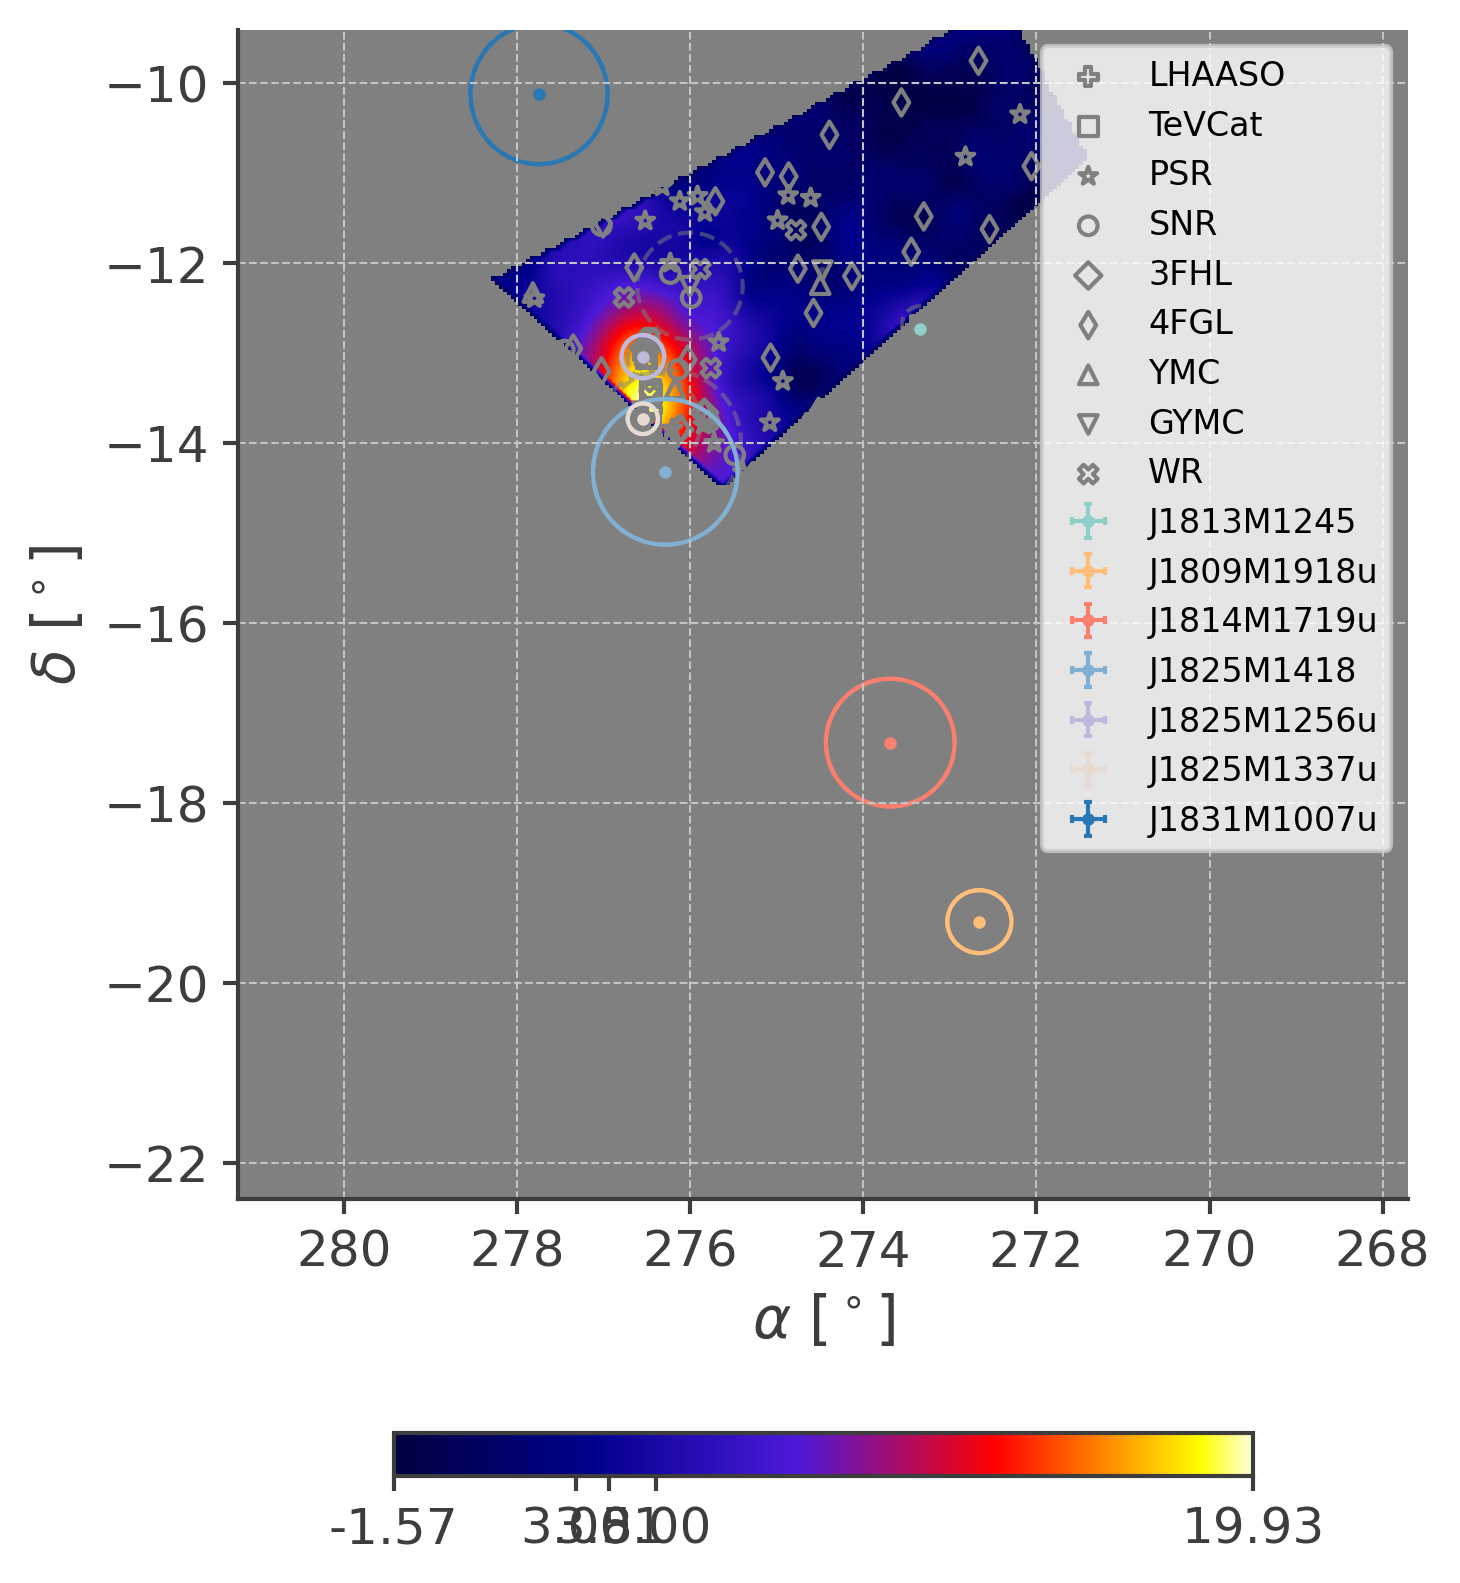

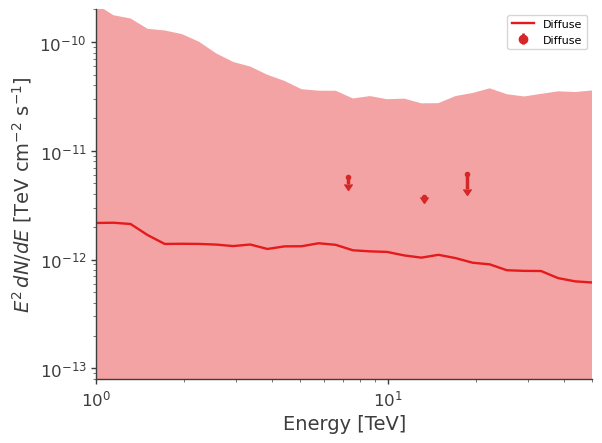

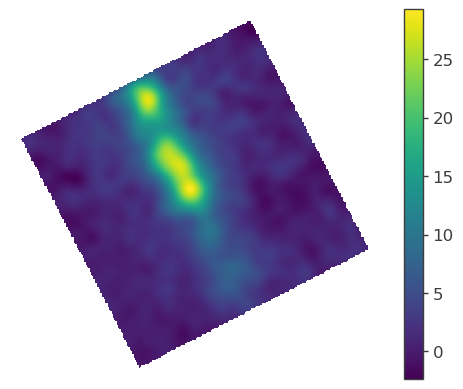

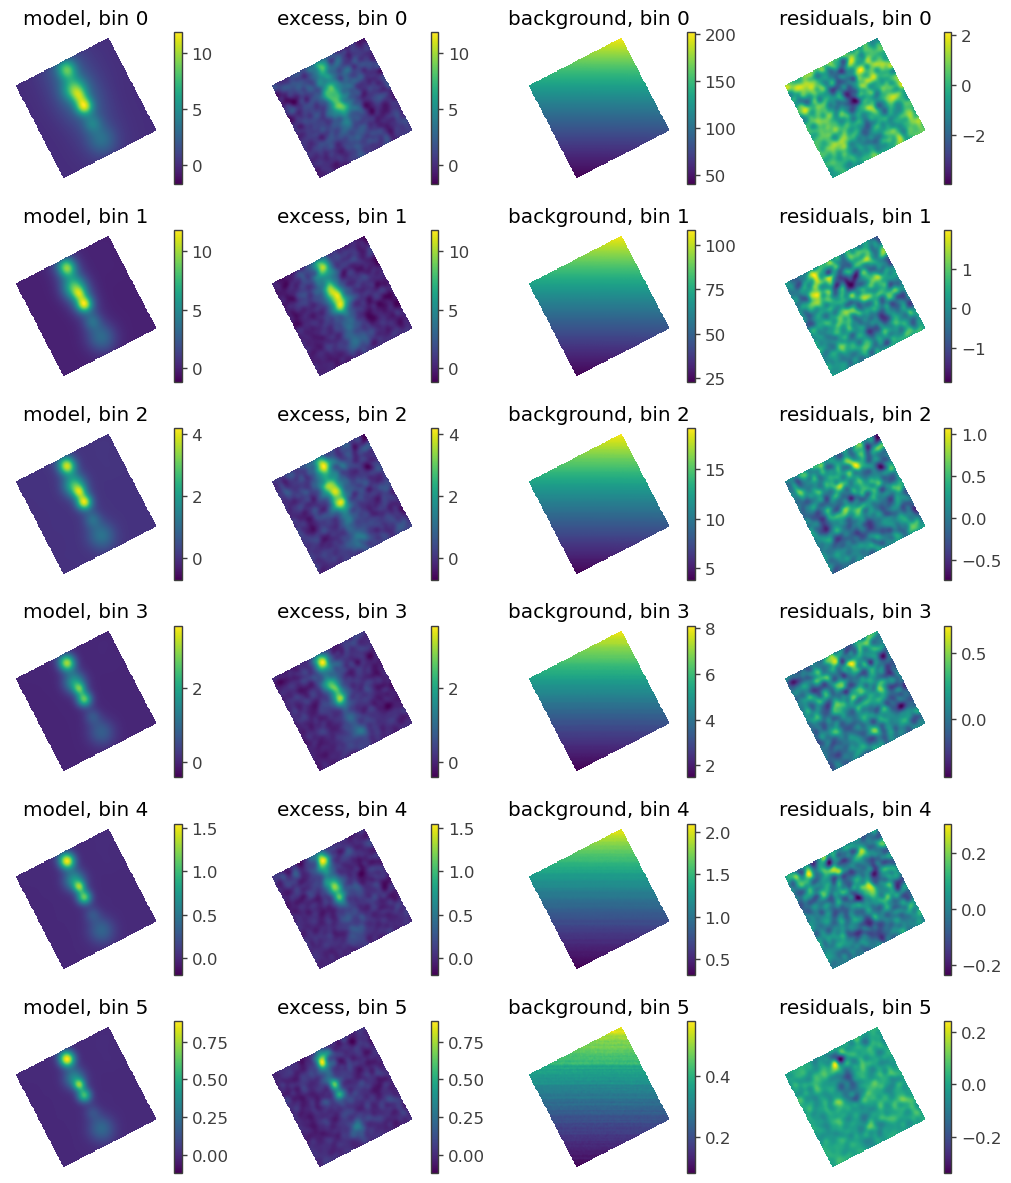

<Figure size 640x480 with 0 Axes>

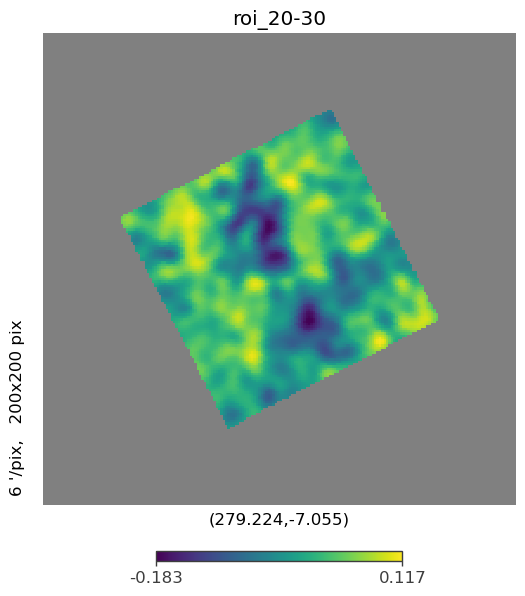

LHAASO:  1 273.36 -12.75  1LHAASO J1813-1245  0.0
LHAASO:  2 273.35 -12.73  1LHAASO J1813-1245   0.0
LHAASO:  3 276.44 -12.94  1LHAASO J1825-1256u  0.0
LHAASO:  4 276.55 -13.04  1LHAASO J1825-1256u   0.24
LHAASO:  5 277.75 -10.12 1LHAASO J1831-1007u*  0.78
LHAASO:  6 277.81 -9.83 1LHAASO J1831-1007u*   0.26
LHAASO:  7 277.84 -10.48  1LHAASO J1831-1028  0.94
LHAASO:  8 277.84 -10.48  1KM2A J1831-1028  0
LHAASO:  9 278.62 -8.53 1LHAASO J1834-0831  0.4
LHAASO:  10 278.44 -8.38 1LHAASO J1834-0831   0.4
LHAASO:  11 279.39 -6.9 1LHAASO J1837-0654u  0.34
LHAASO:  12 279.31 -6.86 1LHAASO J1837-0654u   0.33
LHAASO:  13 279.79 -5.81  1LHAASO J1839-0548u  0.22
LHAASO:  14 279.85 -5.9  1LHAASO J1839-0548u   0.22
LHAASO:  15 280.33 -5.33 1LHAASO J1841-0519  0.6
LHAASO:  16 280.21 -5.23 1LHAASO J1841-0519   0.62
LHAASO:  17 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  18 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  19 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  20 282.02 -1.78 1LHAASO J184

Best fit values:

result             unit
parameter                                                                  
Diffuse.spectrum.main.PowerlawM.K  (-2.5 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA          1543.5924
total         1543.5924

Values of statistical measures:

statistical measures
AIC           3089.184823
BIC           3099.300796

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (1.4 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1504.063288
total       1504.063288

Values of statistical measures:

statistical measures
AIC           3010.126597
BIC           3020.242570

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (2.8 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1415.312467
total       1415.312467

Values of statistical measures:

statistical measures
AIC           2832.624956
BIC           2842.740928

Best fit values:

result             unit
parameter                                                                 
Diffuse.spectrum.main.PowerlawM.K  (3.2 +/- 0.4) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1441.331463
total       1441.331463

Values of statistical measures:

statistical measures
AIC           2884.662949
BIC           2894.778922

Best fit values:

result             unit
parameter                                                             
Diffuse.spectrum.main.PowerlawM.K  (7 +/- 4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1298.496098
total       1298.496098

Values of statistical measures:

statistical measures
AIC           2598.992218
BIC           2609.108191

Best fit values:

result             unit
parameter                                                              
Diffuse.spectrum.main.PowerlawM.K  (-6 +/- 4) x 10^-22  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1261.741618
total       1261.741618

Values of statistical measures:

statistical measures
AIC           2525.483257
BIC           2535.599230

100%|██████████| 6/6 [00:29<00:00,  4.89s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:20:20 INFO      Region of Interest:                                                                   ]8;id=94107;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=487196;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=468621;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=932125;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (283.803, 1.840), model radius: 7.000 ]8;id=736101;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=40256;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  deg, display radius: 6.500 deg, threshold = 0.50                                                 

         INFO                                                                                            ]8;id=890055;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=304154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=429493;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=89994;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=91464;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=915854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 140 x 140 px                                                           ]8;id=336670;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=531110;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=111413;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=72320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=822020;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=883441;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=131758;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=916171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=704586;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=862912;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=273720;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=911550;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=951525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=381812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=444947;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=795473;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=408115;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=609809;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=864829;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=760121;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=738167;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=130472;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  7.390070e+06  7.330045e+06  1.008189          30468  \
1   1   1024   RING  3.956166e+06  3.889984e+06  1.017013          30468   
2   2   1024   RING  7.105932e+05  6.856241e+05  1.036418          30468   
3   3   1024   RING  3.047246e+05  2.890172e+05  1.054347          30468   
4   4   1024   RING  8.072533e+04  7.464780e+04  1.081416          30468   
5   5   1024   RING  2.268091e+04  2.017328e+04  1.124305          30468   

   Area (deg^2)  
0     99.889058  
1     99.889058  
2     99.889058  
3     99.889058  
4     99.889058  
5     99.889058

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=941172;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=170176;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=3282;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=372959;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=549545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=119029;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=328907;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=828096;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=761513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=66986;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=663501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=872452;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:20:21 INFO      J1843M0335u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=85596;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=630999;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=222560;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=327915;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=9.01e-13 kb=(2.56e-13, 1.55e-12) index=-2.58 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=316837;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=339704;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.40 sb=(0.24,0.56) fitrange=0.48                                                         

         INFO      J1848M0153u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=703962;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=229491;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=813131;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=161943;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.05e-13 kb=(1.05e-13, 1.31e-12) index=-2.65 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=363207;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=737780;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.51 sb=(0.27,0.75) fitrange=0.80                                                         

         INFO      J1850M0004u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=762560;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=608339;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

18:20:22 INFO      Spec:                                                                               ]8;id=850933;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=231845;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=5.30e-13 kb=(5.00e-14, 1.01e-12) index=-2.49 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=369305;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=813317;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.46 sb=(0.30,0.62) fitrange=0.64                                                         

         INFO      J1852P0050u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=540241;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=730344;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=755644;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=427234;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.67e-13 kb=(1.00e-15, 1.52e-12) index=-2.74 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=206504;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=124775;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.64 sb=(0.08,1.20) fitrange=1.60                                                         

         INFO      J1857P0245 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=365771;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=281824;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=809146;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=921680;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.04e-13 kb=(1.00e-15, 1.26e-12) index=-2.93 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=320428;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=143394;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.24 sb=(0.00,0.56) fitrange=0.88                                                         

         INFO      J1857P0203u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=660723;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=912135;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=118886;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=631154;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.68e-13 kb=(1.00e-15, 8.13e-13) index=-2.46 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=516692;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=75014;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.19 sb=(0.00,0.43) fitrange=0.88                                                         

         INFO      J1858P0330 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=211294;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=494831;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=835897;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=521073;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.84e-13 kb=(1.00e-15, 1.23e-12) index=-2.63 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=6236;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=897737;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.52 sb=(0.00,1.16) fitrange=2.72                                                         

         INFO      J1902P0648 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=501769;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=644481;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=763743;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=748160;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.50e-14 kb=(1.00e-15, 2.40e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.80                                                                  ]8;id=555474;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=921722;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1906P0712 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=561646;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=742298;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=558650;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=999074;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.01e-13 kb=(1.00e-15, 4.76e-13) index=-2.72 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=658109;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=483925;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.21 sb=(0.00,0.61) fitrange=1.68                                                         

         INFO      J1908P0615u in model_radius: 7 sf:True pf:True kf:True indexf:True                  ]8;id=717967;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=395988;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=338453;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=5409;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.97e-13 kb=(1.00e-15, 1.61e-12) index=-2.42 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=471743;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=442599;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.27,0.59) fitrange=0.40                                                         

         INFO      J1910P0516 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=820802;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=535252;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=71485;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=234310;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.60e-14 kb=(1.00e-15, 5.21e-13) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=45519;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=120098;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.29 sb=(0.00,1.01) fitrange=3.04                                                         

         INFO      Set diffuse range: [27, 43] [-8, 8]                                                ]8;id=254810;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=204311;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=479799;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=139716;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (287.34086682842513, -8.890290164211233)                                           ]8;id=273093;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=302762;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (294.60929137943066, 5.198770996908663)                                            ]8;id=257561;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=824030;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (280.2214435932996, 12.564150815410274)                                            ]8;id=430451;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=657625;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (273.03715951687303, -1.5828020256848583)                                          ]8;id=696022;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=18697;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=657131;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=891533;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 1.1918404748695861e-05                                                ]8;id=365354;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=252054;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.09405477224145048                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=545468;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=391516;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_fixpfixspecfm_dust_bkg_template.fits    ]8;id=439034;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=548540;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                   N
Point sources      1
Extended sources  11
Particle sources   0

Free parameters (2):
--------------------

                                     value min_value max_value            unit
Diffuse.spectrum.main.Powerlaw.K       0.0       0.0       0.0  keV-1 s-1 cm-2
Diffuse.spectrum.main.Powerlaw.index  -2.5      -4.5      -0.5                

Fixed parameters (69):
---------------------

                                                                                     value   
J1843M0335u.Gaussian_on_sphere.lon0                                                 281.01  \
J1843M0335u.Gaussian_on_sphere.lat0                                                   -3.5   
J1843M0335u.Gaussian_on_sphere.sigma                                                   0.4   
J1843M0335u.spectrum.main.Powerlaw.K                                                   0.0   
J1843M0335u.spectrum.main.Powerlaw.piv                                        3000000000.0   
...                                                                                    ...   
J1910P0516.spectrum.main.Powerlaw.index                                              -2.54   
Diffuse.SpatialTemplate_2D.K                                                           1.0   
Diffuse.SpatialTemplate_2D.hash          1585184372110676103083303438909629193723990966...   
Diffuse.SpatialTemplate_2D.ihdu                                                        0.0   
Diffuse.spectrum.main.Powerlaw.piv                                            3000000000.0   

                                        min_value max_value            unit  
J1843M0335u.Gaussian_on_sphere.lon0        280.53    281.49             deg  
J1843M0335u.Gaussian_on_sphere.lat0         -3.98     -3.02             deg  
J1843M0335u.Gaussian_on_sphere.sigma         0.24      0.56             deg  
J1843M0335u.spectrum.main.Powerlaw.K          0.0       0.0  keV-1 s-1 cm-2  
J1843M0335u.spectrum.main.Powerlaw.piv       None      None             keV  
...                                           ...       ...             ...  
J1910P0516.spectrum.main.Powerlaw.index      -4.0      -1.0                  
Diffuse.SpatialTemplate_2D.K                 None      None           deg-2  
Diffuse.SpatialTemplate_2D.hash              None      None                  
Diffuse.SpatialTemplate_2D.ihdu               0.0      None                  
Diffuse.spectrum.main.Powerlaw.piv           None      None             keV  

[69 rows x 4 columns]

Properties (2):
--------------------

                                                                                  value   
Diffuse.SpatialTemplate_2D.fits_file  ../../data/Diffuse_WCDA_fixpfixspecfm_dust_bkg...  \
Diffuse.SpatialTemplate_2D.frame                                                   icrs   

                                                            allowed values  
Diffuse.SpatialTemplate_2D.fits_file                                  None  
Diffuse.SpatialTemplate_2D.frame      [icrs, galactic, fk5, fk4, fk4_no_e]  

Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

Linked functions (0):
----------------------

(none)

18:20:23 INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=89810;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=646881;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=913639;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=881725;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=580383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=312116;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=678246;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=724324;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=577496;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=10566;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=250990;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=632743;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=887866;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=969131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=132743;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=773162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=816063;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=467535;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=902079;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=927806;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=799565;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=547718;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=566317;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=361226;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=602882;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=365168;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=5635;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=631285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=415935;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=507392;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=931416;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=595879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=223950;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=356834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=137727;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=326498;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=287045;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=639150;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=716415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=312318;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=405671;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=706091;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.970                       ]8;id=590483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=372841;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=316050;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=673184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=68167;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=203210;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                           
Diffuse.spectrum.main.Powerlaw.K      (3.26 -0.11 +0.12) x 10^-21  \
Diffuse.spectrum.main.Powerlaw.index             -2.569 +/- 0.029   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.52
-0.52  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        9083.376763
total       9083.376763

Values of statistical measures:

statistical measures
AIC          18170.753592
BIC          18190.985910

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:20:42 INFO      Considering 6 dec bins for extended source J1843M0335u           ]8;id=691489;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=856470;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -3.500                      ]8;id=276343;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=729779;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1848M0153u           ]8;id=422231;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=765049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -1.890                      ]8;id=944539;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=782844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1850M0004u           ]8;id=731480;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=744725;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = -0.070                      ]8;id=407482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=552852;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1852P0050u           ]8;id=286350;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=178302;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.400                       ]8;id=787752;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=487008;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0245            ]8;id=579148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=898763;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 2.750                       ]8;id=286352;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=684094;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1857P0203u           ]8;id=858531;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=342979;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.980                       ]8;id=225706;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=862666;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1858P0330            ]8;id=32625;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=166817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 3.700                       ]8;id=566483;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=694675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=692740;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=810777;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=340507;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=976975;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=958952;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=546808;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=454945;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=683073;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 7 dec bins for extended source J1910P0516            ]8;id=993140;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=698552;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=975342;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=368545;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=125457;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=276184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 1.970                       ]8;id=514331;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=758038;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(285.4248046875, 5.679189845582371)


<Figure size 640x480 with 0 Axes>

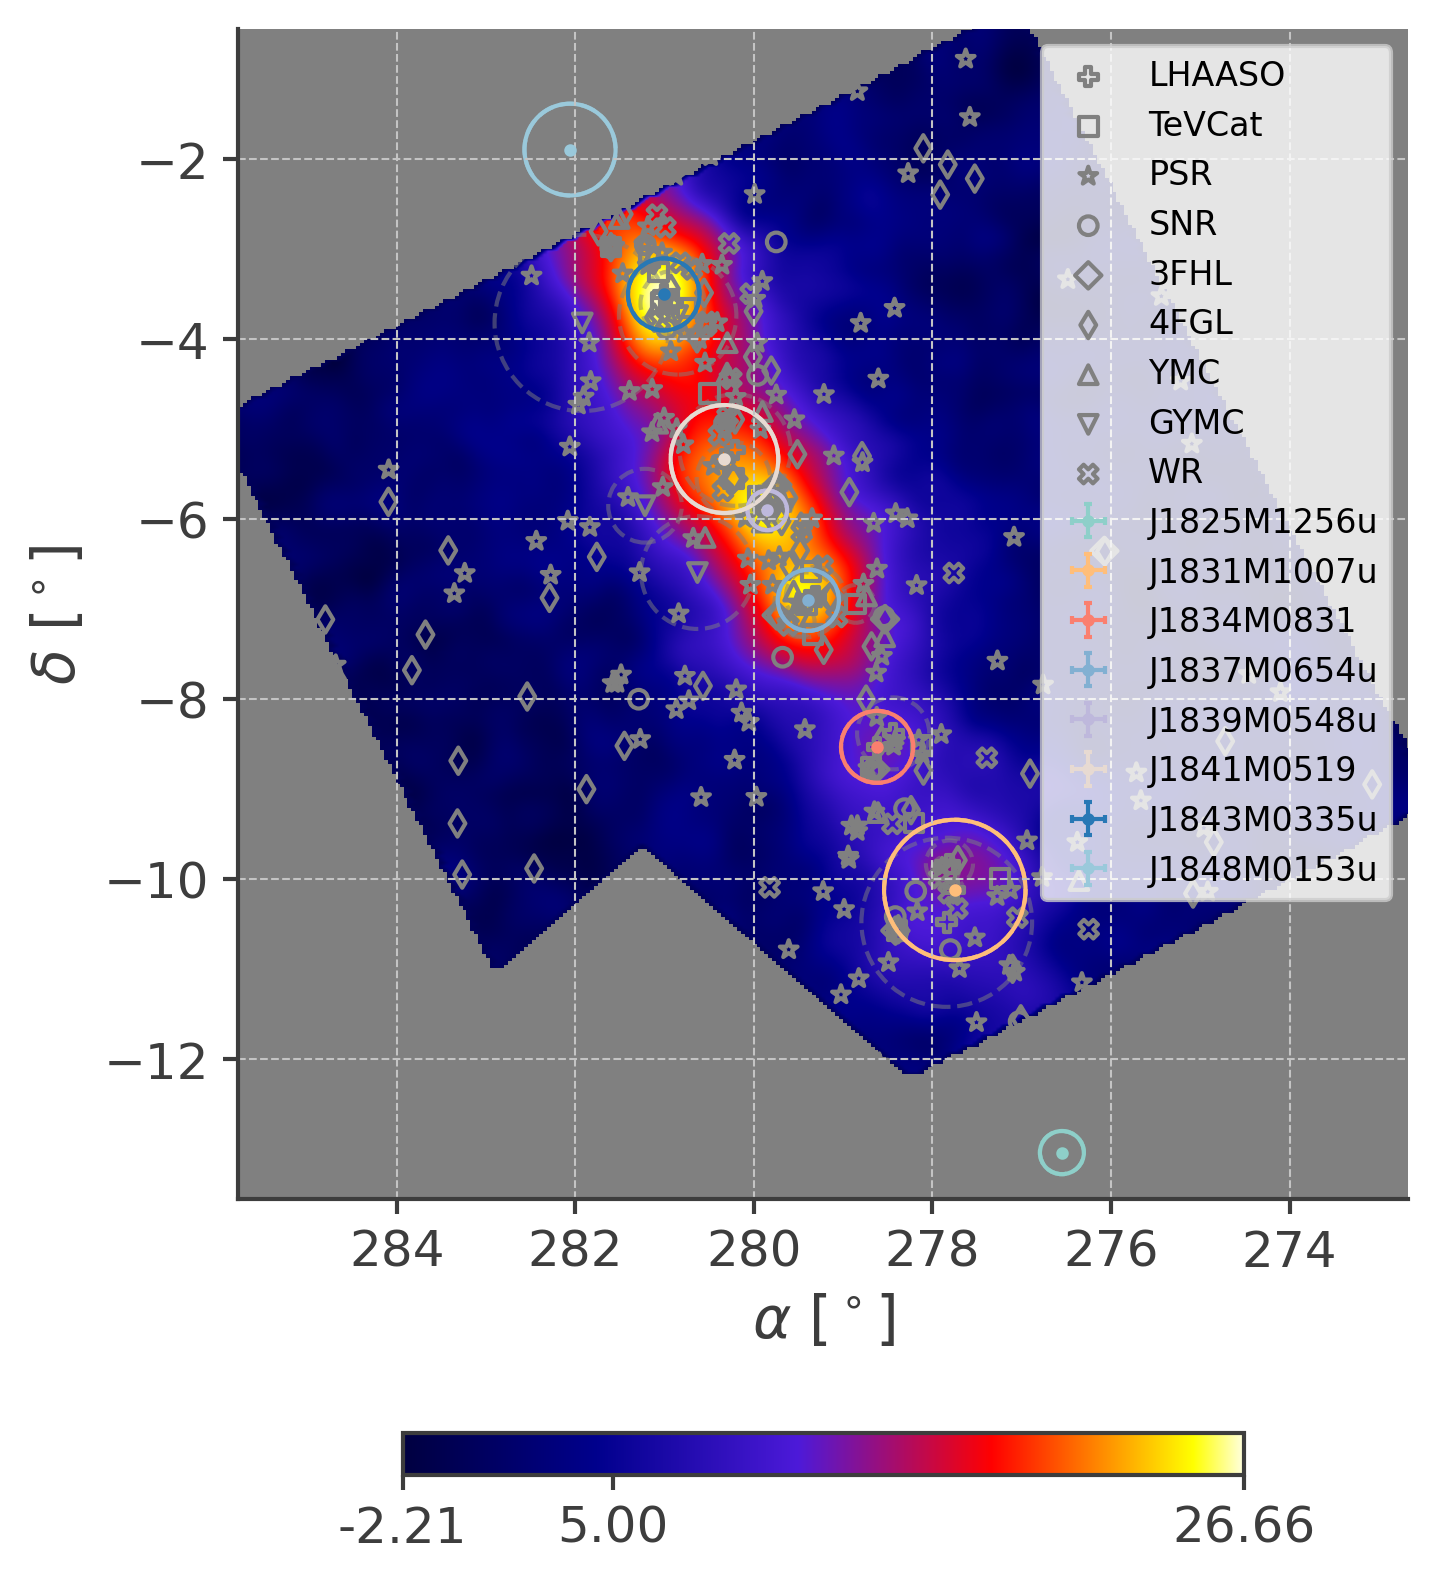

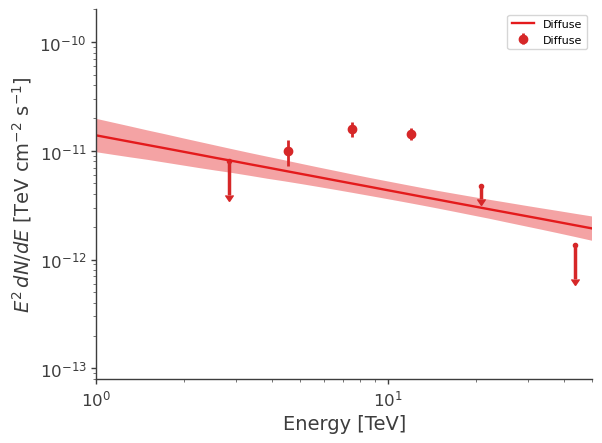

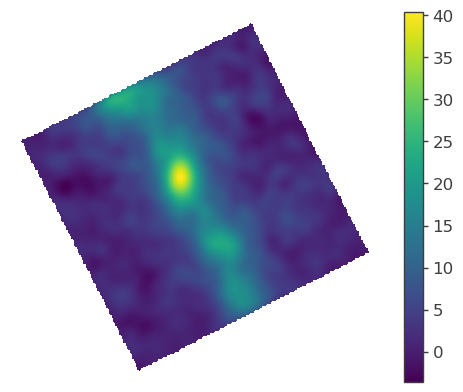

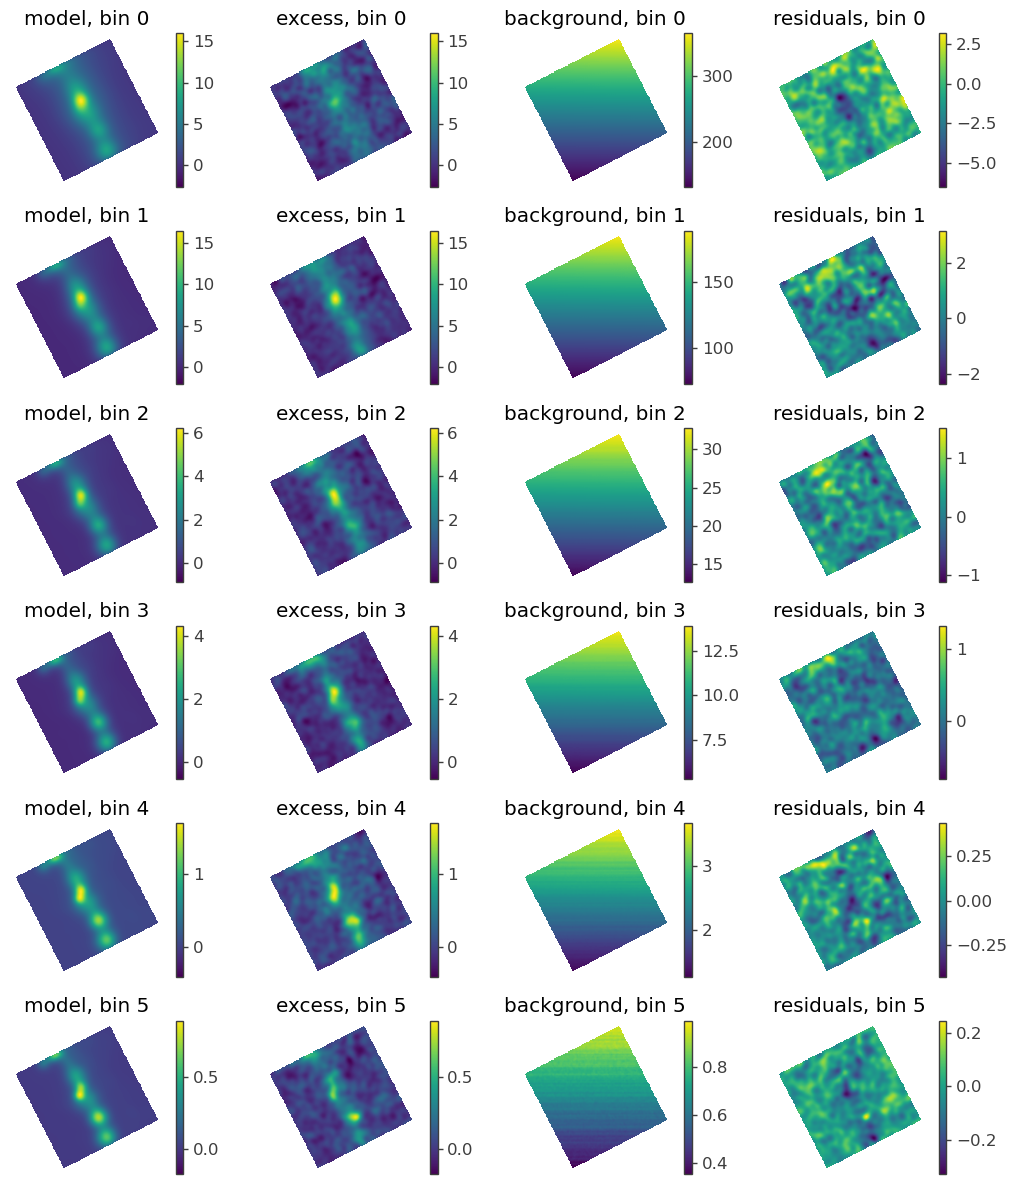

<Figure size 640x480 with 0 Axes>

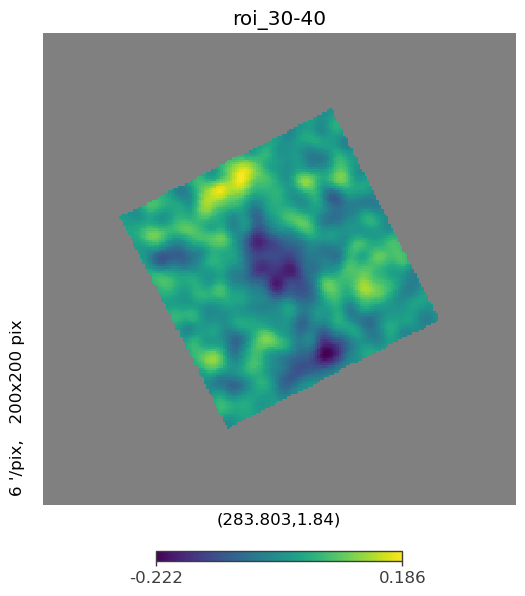

LHAASO:  1 280.91 -3.6  1LHAASO J1843-0335u  0.36
LHAASO:  2 281.01 -3.5  1LHAASO J1843-0335u   0.4
LHAASO:  3 282.06 -1.89 1LHAASO J1848-0153u  0.51
LHAASO:  4 282.02 -1.78 1LHAASO J1848-0153u   0.56
LHAASO:  5 282.19 -0.02  1LHAASO J1848-0001u  0.0
LHAASO:  6 282.19 -0.02  1KM2A J1848-0001u  0
LHAASO:  7 282.74 -0.07 1LHAASO J1850-0004u*  0.46
LHAASO:  8 282.89 -0.07 1LHAASO J1850-0004u*   0.21
LHAASO:  9 283.1 0.84  1LHAASO J1852+0050u*  0.85
LHAASO:  10 283.73 1.4  1LHAASO J1852+0050u*   0.64
LHAASO:  11 284.37 2.75 1LHAASO J1857+0245  0.24
LHAASO:  12 284.38 2.06  1WCDA J1857+0203u  0.28
LHAASO:  13 284.5 1.98  1LHAASO J1857+0203u   0.19
LHAASO:  14 284.59 3.51  1LHAASO J1858+0330  0.43
LHAASO:  15 284.79 3.7  1LHAASO J1858+0330   0.52
LHAASO:  16 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  17 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  18 287.05 6.26  1WCDA J1908+0615u  0.36
LHAASO:  19 287.05 6.26  1LHAASO J1908+0615u   0.43
LHAASO:  20 287.55 5.28  1LHAASO J1910+0516*  0.0
LHAAS

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.17 +/- 0.24) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1544.919898
total       1544.919898

Values of statistical measures:

statistical measures
AIC           3091.839817
BIC           3101.955987

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (3.71 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1559.133048
total       1559.133048

Values of statistical measures:

statistical measures
AIC           3120.266119
BIC           3130.382288

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.91 +/- 0.26) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1564.662621
total       1564.662621

Values of statistical measures:

statistical measures
AIC           3131.325264
BIC           3141.441434

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (4.19 +/- 0.23) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1517.159397
total       1517.159397

Values of statistical measures:

statistical measures
AIC           3036.318816
BIC           3046.434986

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (3.18 +/- 0.27) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1400.138223
total       1400.138223

Values of statistical measures:

statistical measures
AIC           2802.276468
BIC           2812.392638

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.69 +/- 0.29) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1413.982085
total       1413.982085

Values of statistical measures:

statistical measures
AIC           2829.964192
BIC           2840.080362

100%|██████████| 6/6 [00:36<00:00,  6.10s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:23:13 INFO      Region of Interest:                                                                   ]8;id=908108;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=843874;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=298513;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=552371;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (288.428, 10.724), model radius:      ]8;id=415549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=872870;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=820506;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=540967;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=966451;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=135791;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=918818;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=524553;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 140 x 140 px                                                           ]8;id=875532;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=720108;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=62131;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=940966;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=225293;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=268122;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=345167;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=631360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=680286;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=832460;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=46543;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=36790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=804340;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=307634;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=662756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=163922;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=513146;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=150879;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=870652;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=887369;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=273043;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=567887;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.237750e+07  1.231712e+07  1.004902          30455  \
1   1   1024   RING  6.369569e+06  6.300819e+06  1.010911          30455   
2   2   1024   RING  1.108544e+06  1.085252e+06  1.021462          30455   
3   3   1024   RING  4.757899e+05  4.600890e+05  1.034126          30455   
4   4   1024   RING  1.287373e+05  1.218636e+05  1.056404          30455   
5   5   1024   RING  3.458448e+04  3.178466e+04  1.088087          30455   

   Area (deg^2)  
0     99.846437  
1     99.846437  
2     99.846437  
3     99.846437  
4     99.846437  
5     99.846437

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=294372;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=300294;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=717426;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=355843;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=705482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=887245;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=818930;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=107178;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=323448;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=997328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=207007;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=947959;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:23:14 INFO      J1902P0648 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=473584;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=696033;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=661642;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=285115;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.50e-14 kb=(1.00e-15, 2.40e-13) index=-2.39 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.80                                                                  ]8;id=942818;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=463506;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#353\353]8;;\

         INFO      J1906P0712 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=423980;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=578428;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=311335;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=744810;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.01e-13 kb=(1.00e-15, 4.76e-13) index=-2.72 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=328973;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=88951;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.21 sb=(0.00,0.61) fitrange=1.68                                                         

         INFO      J1907P0826 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=612411;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=941183;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=889555;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=222290;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.34e-13 kb=(1.00e-15, 5.69e-13) index=-2.62 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=196894;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=140138;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.00,1.07) fitrange=2.48                                                         

         INFO      J1908P0615u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=332439;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=972975;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=164746;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=317771;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.97e-13 kb=(1.00e-15, 1.61e-12) index=-2.42 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=120712;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=315859;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.43 sb=(0.27,0.59) fitrange=0.40                                                         

         INFO      J1910P0516 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=359473;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=914413;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=596307;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=783194;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=8.60e-14 kb=(1.00e-15, 5.21e-13) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=214950;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=982911;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.29 sb=(0.00,1.01) fitrange=3.04                                                         

         INFO      J1912P1014u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=668428;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=19986;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=806397;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=375273;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=3.07e-13 kb=(1.00e-15, 6.67e-13) index=-2.68 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=672142;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=947347;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.36 sb=(0.12,0.60) fitrange=0.64                                                         

         INFO      J1914P1150u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=769029;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=687470;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=334576;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=26920;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.09e-13 kb=(1.00e-15, 2.89e-13) index=-2.34 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=965023;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=147755;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.33 sb=(0.01,0.65) fitrange=1.12                                                         

         INFO      J1922P1403 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=848802;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=314668;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=922736;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=287126;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.37e-13 kb=(1.00e-15, 2.87e-13) index=-2.62 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=625489;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=384198;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.18 sb=(0.02,0.34) fitrange=0.56                                                         

         INFO      J1924P1609 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=446114;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=345968;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=517705;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=176419;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.44e-13 kb=(1.00e-15, 1.06e-12) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=285937;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=601670;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.45 sb=(0.57,2.33) fitrange=3.44                                                         

         INFO      Set diffuse range: [36, 52] [-8, 8]                                                ]8;id=782577;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=458678;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=666042;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=263505;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (291.3734095715683, -0.9333861386465837)                                           ]8;id=158318;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=301895;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (299.0292661469791, 12.971192391637747)                                            ]8;id=237887;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=221337;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (284.3072053919512, 20.571897552965403)                                            ]8;id=386720;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=455232;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (277.1024382189087, 6.351715544083082)                                             ]8;id=795162;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=31398;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=958934;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=826486;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 9.926864854876973e-06                                                 ]8;id=145603;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=608571;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.07833842134781312                                                                       

         INFO      set K to: 1e-12                                                                    ]8;id=63373;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=47203;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_fixpfixspecfm_dust_bkg_template.fits    ]8;id=359557;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=815527;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     1
Extended sources  9
Particle sources  0

Free parameters (2):
--------------------

                                     value min_value max_value            unit
Diffuse.spectrum.main.Powerlaw.K       0.0       0.0       0.0  keV-1 s-1 cm-2
Diffuse.spectrum.main.Powerlaw.index  -2.5      -4.5      -0.5                

Fixed parameters (57):
---------------------

                                                                                      value   
J1902P0648.position.ra                                                               285.58  \
J1902P0648.position.dec                                                                 6.8   
J1902P0648.spectrum.main.Powerlaw.K                                                     0.0   
J1902P0648.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1902P0648.spectrum.main.Powerlaw.index                                               -2.39   
J1906P0712.Gaussian_on_sphere.lon0                                                   286.56   
J1906P0712.Gaussian_on_sphere.lat0                                                      7.2   
J1906P0712.Gaussian_on_sphere.sigma                                                    0.21   
J1906P0712.spectrum.main.Powerlaw.K                                                     0.0   
J1906P0712.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1906P0712.spectrum.main.Powerlaw.index                                               -2.72   
J1907P0826.Gaussian_on_sphere.lon0                                                   286.96   
J1907P0826.Gaussian_on_sphere.lat0                                                     8.44   
J1907P0826.Gaussian_on_sphere.sigma                                                    0.43   
J1907P0826.spectrum.main.Powerlaw.K                                                     0.0   
J1907P0826.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1907P0826.spectrum.main.Powerlaw.index                                               -2.62   
J1908P0615u.Gaussian_on_sphere.lon0                                                  287.05   
J1908P0615u.Gaussian_on_sphere.lat0                                                    6.26   
J1908P0615u.Gaussian_on_sphere.sigma                                                   0.43   
J1908P0615u.spectrum.main.Powerlaw.K                                                    0.0   
J1908P0615u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1908P0615u.spectrum.main.Powerlaw.index                                              -2.42   
J1910P0516.Gaussian_on_sphere.lon0                                                   287.88   
J1910P0516.Gaussian_on_sphere.lat0                                                     5.07   
J1910P0516.Gaussian_on_sphere.sigma                                                    0.29   
J1910P0516.spectrum.main.Powerlaw.K                                                     0.0   
J1910P0516.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1910P0516.spectrum.main.Powerlaw.index                                               -2.54   
J1912P1014u.Gaussian_on_sphere.lon0                                                  288.22   
J1912P1014u.Gaussian_on_sphere.lat0                                                   10.25   
J1912P1014u.Gaussian_on_sphere.sigma                                                   0.36   
J1912P1014u.spectrum.main.Powerlaw.K                                                    0.0   
J1912P1014u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1912P1014u.spectrum.main.Powerlaw.index                                              -2.68   
J1914P1150u.Gaussian_on_sphere.lon0                                                  288.81   
J1914P1150u.Gaussian_on_sphere.lat0           

18:23:16 INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=887612;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=206868;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=54606;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=597531;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=511992;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=21613;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=259576;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=163689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=243800;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=166141;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=968339;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=560074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=821059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=895162;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=295250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=730209;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=484622;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=478778;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=374661;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=350042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=813817;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=221189;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=706076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=229905;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=43276;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=612599;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=961364;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=804022;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1924P1609           ]8;id=474934;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=752482;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=337013;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=344706;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=339000;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=749065;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 9.953                       ]8;id=627344;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=644358;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=564675;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=68402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=98812;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=214570;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                        
Diffuse.spectrum.main.Powerlaw.K      (2.25 +/- 0.09) x 10^-21  \
Diffuse.spectrum.main.Powerlaw.index            -2.52 +/- 0.04   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.42
-0.42  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8761.779094
total       8761.779094

Values of statistical measures:

statistical measures
AIC          17527.558253
BIC          17547.789717

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

18:23:33 INFO      Considering 5 dec bins for extended source J1906P0712            ]8;id=293580;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=500886;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 7.200                       ]8;id=663834;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=101285;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 8 dec bins for extended source J1907P0826            ]8;id=437516;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=294641;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 8.440                       ]8;id=809378;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=970142;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1908P0615u           ]8;id=149937;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=745888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 6.260                       ]8;id=623478;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=292138;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1910P0516            ]8;id=441880;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=368695;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 5.070                       ]8;id=632803;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=148907;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1912P1014u           ]8;id=341711;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=751771;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 10.250                      ]8;id=5826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=405335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1914P1150u           ]8;id=671851;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=535021;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 11.740                      ]8;id=189283;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=404801;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=617176;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=401757;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=919190;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=694430;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 10 dec bins for extended source J1924P1609           ]8;id=398040;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=261511;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=361846;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=796074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=36955;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=584243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 9.953                       ]8;id=898366;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=468263;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(288.50097656249994, 6.504500094011917)


<Figure size 640x480 with 0 Axes>

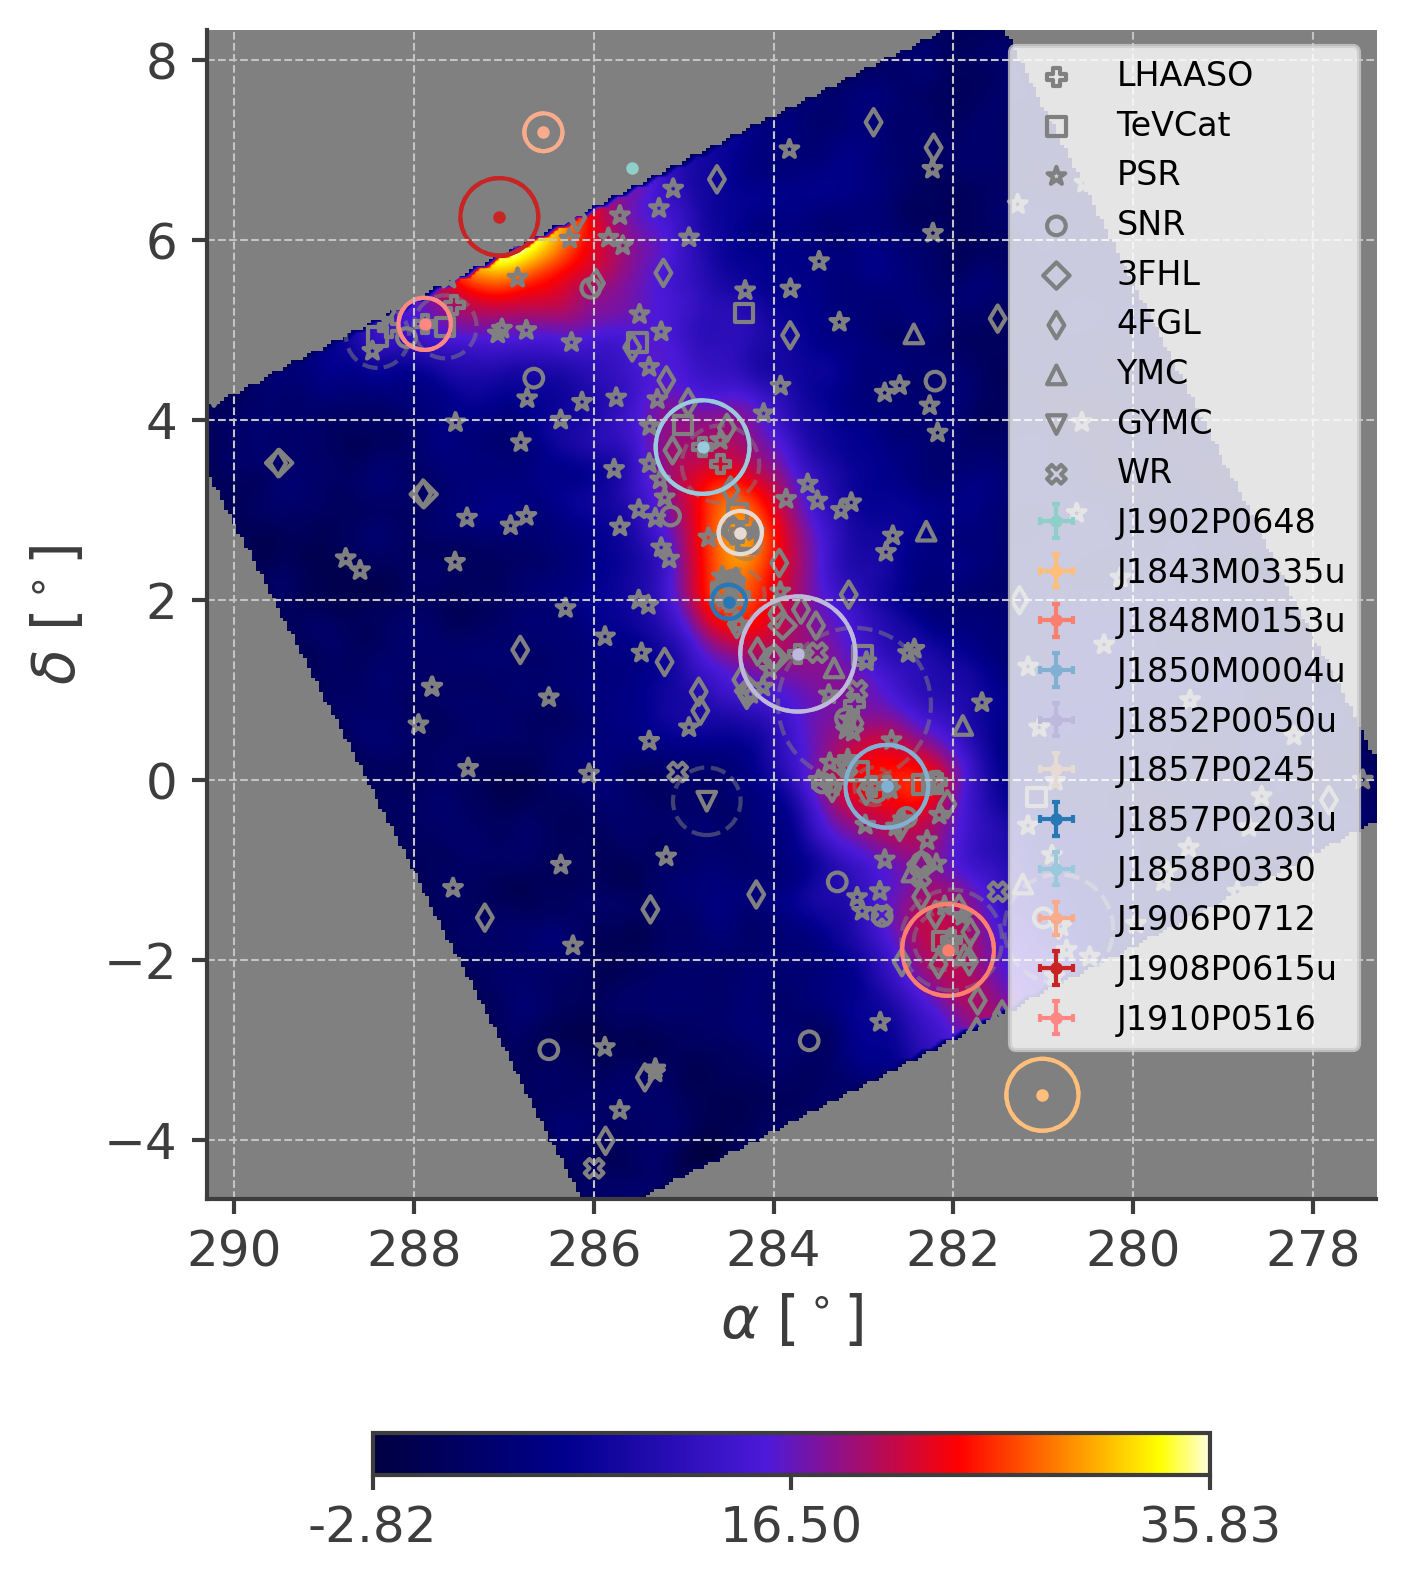

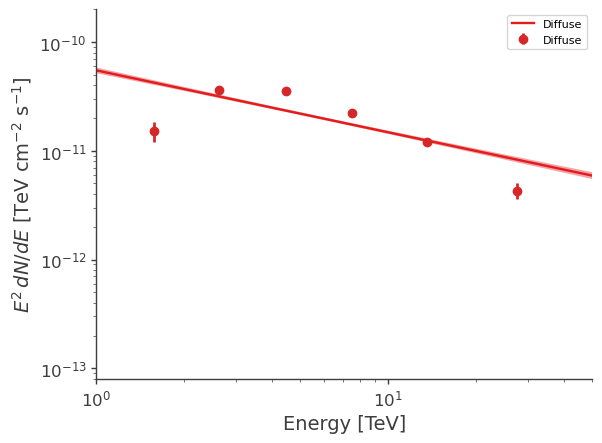

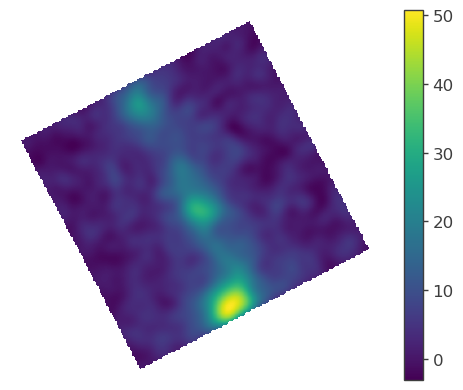

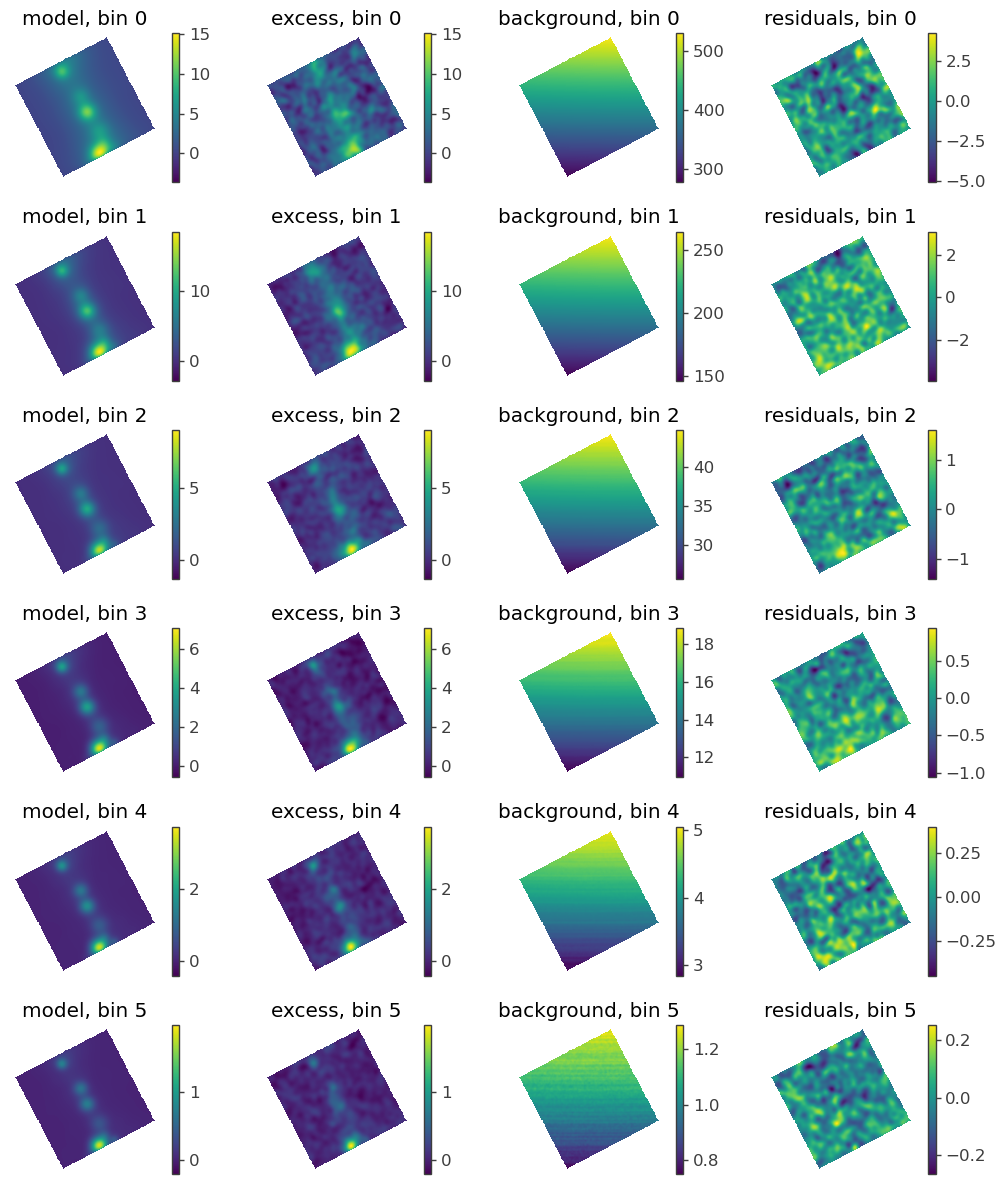

<Figure size 640x480 with 0 Axes>

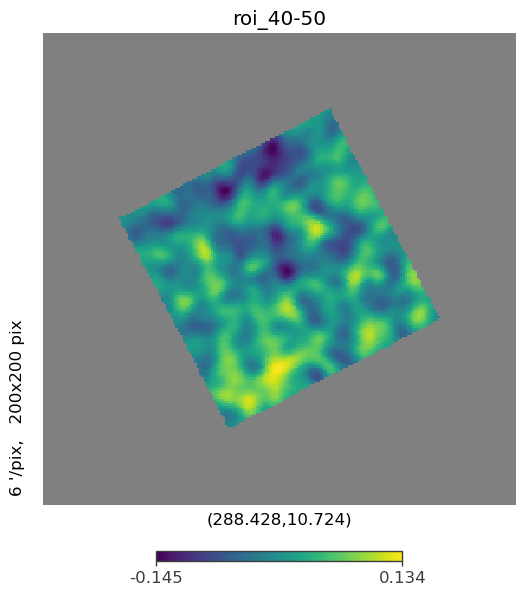

LHAASO:  1 285.58 6.8 1LHAASO J1902+0648  0.0
LHAASO:  2 286.56 7.2 1WCDA J1906+0712  0.21
LHAASO:  3 286.96 8.44 1WCDA J1907+0826  0.43
LHAASO:  4 287.05 6.26  1WCDA J1908+0615u  0.36
LHAASO:  5 287.05 6.26  1LHAASO J1908+0615u   0.43
LHAASO:  6 287.55 5.28  1LHAASO J1910+0516*  0.0
LHAASO:  7 287.88 5.07  1LHAASO J1910+0516*   0.29
LHAASO:  8 288.22 10.25 1LHAASO J1912+1014u  0.36
LHAASO:  9 288.38 10.5 1LHAASO J1912+1014u   0.5
LHAASO:  10 288.28 5.03  1LHAASO J1913+0501  0.0
LHAASO:  11 288.28 5.03  1KM2A J1913+0501  0
LHAASO:  12 288.73 11.84  1LHAASO J1914+1150u  0.21
LHAASO:  13 288.81 11.74  1LHAASO J1914+1150u   0.33
LHAASO:  14 289.78 15.93  1LHAASO J1919+1556  0.0
LHAASO:  15 289.78 15.93  1KM2A J1919+1556  0
LHAASO:  16 290.7 14.06 1LHAASO J1922+1403  0.18
LHAASO:  17 290.73 14.11 1LHAASO J1922+1403   0.0
LHAASO:  18 291.09 16.15 1LHAASO J1924+1609  1.45
LHAASO:  19 290.53 15.71 1LHAASO J1924+1609   1.22
LHAASO:  20 292.79 16.9  1LHAASO J1931+1653  0.0
LHAASO:  21 292.79 16

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.29 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1476.139548
total       1476.139548

Values of statistical measures:

statistical measures
AIC           2954.279119
BIC           2964.394862

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.91 +/- 0.17) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         1563.21112
total        1563.21112

Values of statistical measures:

statistical measures
AIC           3128.422261
BIC           3138.538004

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.62 +/- 0.20) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1508.309794
total       1508.309794

Values of statistical measures:

statistical measures
AIC           3018.619609
BIC           3028.735352

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.37 +/- 0.18) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1460.811248
total       1460.811248

Values of statistical measures:

statistical measures
AIC           2923.622518
BIC           2933.738261

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (2.26 +/- 0.21) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        1432.785084
total       1432.785084

Values of statistical measures:

statistical measures
AIC           2867.570189
BIC           2877.685932

Best fit values:

result             unit
parameter                                                                   
Diffuse.spectrum.main.PowerlawM.K  (1.57 +/- 0.24) x 10^-21  1 / (keV s cm2)

Correlation matrix:

1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA         1295.87623
total        1295.87623

Values of statistical measures:

statistical measures
AIC           2593.752481
BIC           2603.868224

100%|██████████| 6/6 [00:31<00:00,  5.28s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



18:25:33 INFO      Region of Interest:                                                                   ]8;id=679981;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=470888;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#292\292]8;;\

         INFO      -------------------                                                                   ]8;id=836872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=373095;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#293\293]8;;\

         INFO      HealpixMapROI: Center (R.A., Dec) = (293.333, 19.535), model radius:      ]8;id=311156;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py\healpix_map_roi.py]8;;\:]8;id=490525;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/region_of_interest/healpix_map_roi.py#134\134]8;;\
                  7.000 deg, display radius: 6.500 deg, threshold = 0.50                                           

         INFO                                                                                            ]8;id=966338;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=988195;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#296\296]8;;\

         INFO      Flat sky projection:                                                                  ]8;id=6143;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=969328;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#297\297]8;;\

         INFO      --------------------                                                                  ]8;id=372729;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=53002;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#298\298]8;;\

         INFO      Width x height 140 x 140 px                                                           ]8;id=875955;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=824310;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#300\300]8;;\

         INFO      Pixel sizes: 0.1 deg                                                                  ]8;id=449928;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=279793;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#305\305]8;;\

         INFO                                                                                            ]8;id=338663;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=848113;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#308\308]8;;\

         INFO      Response:                                                                             ]8;id=982836;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=689041;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#309\309]8;;\

         INFO      ---------                                                                             ]8;id=361682;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=951254;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#310\310]8;;\

         INFO      Response file:                                                                   ]8;id=622562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=142667;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#340\340]8;;\
                  /data/home/cwy/Science/3MLWCDA/Standard/src/../../data/DR_ihep_MK2_newoldDRpsf.ro                
                  ot                                                                                               

         INFO      Number of dec bins: 110                                                          ]8;id=702074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=317290;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#341\341]8;;\

         INFO      Number of energy/nHit planes per dec bin_name: 6                                 ]8;id=585655;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py\response.py]8;;\:]8;id=435773;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/response/response.py#344\344]8;;\

         INFO                                                                                            ]8;id=634076;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=773431;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#314\314]8;;\

         INFO      Map Tree:                                                                             ]8;id=840530;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=76896;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#315\315]8;;\

         INFO      ----------                                                                            ]8;id=80064;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=157794;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#316\316]8;;\

Bin  Nside Scheme    Obs counts    Bkg counts   obs/bkg  Pixels in ROI   
0   0   1024   RING  1.705513e+07  1.700429e+07  1.002990          30468  \
1   1   1024   RING  8.489190e+06  8.426235e+06  1.007471          30468   
2   2   1024   RING  1.434030e+06  1.415547e+06  1.013057          30468   
3   3   1024   RING  6.091237e+05  5.965805e+05  1.021025          30468   
4   4   1024   RING  1.638264e+05  1.583030e+05  1.034891          30468   
5   5   1024   RING  4.187371e+04  3.997588e+04  1.047474          30468   

   Area (deg^2)  
0     99.889058  
1     99.889058  
2     99.889058  
3     99.889058  
4     99.889058  
5     99.889058

         INFO      This Map Tree contains 795.961 transits in the first bin                         ]8;id=165431;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=717382;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#149\149]8;;\

         INFO      Total data size: 2.92 Mb                                                         ]8;id=862488;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py\map_tree.py]8;;\:]8;id=670929;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/maptree/map_tree.py#151\151]8;;\

         INFO                                                                                            ]8;id=584024;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=930787;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#320\320]8;;\

         INFO      Active energy/nHit planes (6):                                                        ]8;id=323258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=111563;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#322\322]8;;\

         INFO      -------------------------------                                                       ]8;id=346018;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=539916;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#323\323]8;;\

         INFO      ['0', '1', '2', '3', '4', '5']                                                        ]8;id=871500;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py\HAL.py]8;;\:]8;id=35107;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/HAL.py#324\324]8;;\

18:25:34 INFO      J1922P1403 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=378992;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=953003;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=558040;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=820011;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=1.37e-13 kb=(1.00e-15, 2.87e-13) index=-2.62 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=547300;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=411386;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.18 sb=(0.02,0.34) fitrange=0.56                                                         

         INFO      J1924P1609 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=4913;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=589306;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=645290;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=589632;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.44e-13 kb=(1.00e-15, 1.06e-12) index=-2.54 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=478079;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=426835;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.45 sb=(0.57,2.33) fitrange=3.44                                                         

         INFO      J1928P1746u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=103503;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=114360;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=700076;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=995030;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=7.90e-14 kb=(4.00e-15, 1.54e-13) index=-2.22 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=200553;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=955528;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.17 sb=(0.01,0.33) fitrange=0.56                                                         

         INFO      J1929P1846u in roi: 6.5 sf:True pf:True kf:True indexf:True                         ]8;id=669434;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=37822;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=290436;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=762886;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.48e-13 kb=(8.30e-14, 4.13e-13) index=-2.37 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=863807;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=31930;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=0.49 sb=(0.33,0.65) fitrange=0.80                                                         

         INFO      J1937P2128 in roi: 6.5 sf:True pf:True kf:True indexf:True                          ]8;id=559149;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=56782;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#315\315]8;;\

         INFO      Spec:                                                                               ]8;id=508367;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=492585;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=2.08e-13 kb=(1.00e-15, 1.09e-12) index=-2.43 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=884433;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=746349;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.25 sb=(0.00,3.09) fitrange=6.48                                                         

         INFO      J1945P2424 in model_radius: 7 sf:True pf:True kf:True indexf:True                   ]8;id=991052;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=4045;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#322\322]8;;\

         INFO      Spec:                                                                               ]8;id=990063;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=246993;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#343\343]8;;\
                   K=4.27e-13 kb=(1.00e-15, 1.19e-12) index=-2.56 indexb=(-4.00,-1.00)                             

         INFO      Mor:                                                                                ]8;id=927611;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=905555;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#345\345]8;;\
                   sigma=1.29 sb=(0.41,2.17) fitrange=2.96                                                         

         INFO      Set diffuse range: [46, 62] [-8, 8]                                                ]8;id=762181;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=940117;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1054\1054]8;;\

         INFO      ra dec coner:                                                                      ]8;id=826444;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=317179;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1055\1055]8;;\

         INFO      (296.04319324510413, 7.805741642317792)                                            ]8;id=424974;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=810337;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1056\1056]8;;\

         INFO      (304.4912371648376, 21.3910013203489)                                              ]8;id=442592;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=259792;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1057\1057]8;;\

         INFO      (289.15715314993014, 29.44921503438924)                                            ]8;id=252064;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=723584;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1058\1058]8;;\

         INFO      (281.5669824344631, 15.232481778869648)                                            ]8;id=523625;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=672667;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1059\1059]8;;\

         INFO      total sr: 0.07772890321151499                                                      ]8;id=781653;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=910189;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1098\1098]8;;\
                  ratio: 0.028307125215400412                                                                      

         INFO      integration: 7.7916172035158e-06                                                   ]8;id=828957;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=401509;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1099\1099]8;;\
                  ratio: 0.061487992472267286                                                                      

         INFO      set K to: 1e-12                                                                    ]8;id=898124;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=424832;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1100\1100]8;;\

         INFO      diffuse file path: ../../data/Diffuse_WCDA_fixpfixspecfm_dust_bkg_template.fits    ]8;id=876200;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=836013;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1127\1127]8;;\

Model summary:
==============

                  N
Point sources     0
Extended sources  7
Particle sources  0

Free parameters (2):
--------------------

                                     value min_value max_value            unit
Diffuse.spectrum.main.Powerlaw.K       0.0       0.0       0.0  keV-1 s-1 cm-2
Diffuse.spectrum.main.Powerlaw.index  -2.5      -4.5      -0.5                

Fixed parameters (40):
---------------------

                                                                                      value   
J1922P1403.Gaussian_on_sphere.lon0                                                    290.7  \
J1922P1403.Gaussian_on_sphere.lat0                                                    14.06   
J1922P1403.Gaussian_on_sphere.sigma                                                    0.18   
J1922P1403.spectrum.main.Powerlaw.K                                                     0.0   
J1922P1403.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1922P1403.spectrum.main.Powerlaw.index                                               -2.62   
J1924P1609.Gaussian_on_sphere.lon0                                                   291.09   
J1924P1609.Gaussian_on_sphere.lat0                                                    16.15   
J1924P1609.Gaussian_on_sphere.sigma                                                    1.45   
J1924P1609.spectrum.main.Powerlaw.K                                                     0.0   
J1924P1609.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1924P1609.spectrum.main.Powerlaw.index                                               -2.54   
J1928P1746u.Gaussian_on_sphere.lon0                                                  292.14   
J1928P1746u.Gaussian_on_sphere.lat0                                                   17.78   
J1928P1746u.Gaussian_on_sphere.sigma                                                   0.17   
J1928P1746u.spectrum.main.Powerlaw.K                                                    0.0   
J1928P1746u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1928P1746u.spectrum.main.Powerlaw.index                                              -2.22   
J1929P1846u.Gaussian_on_sphere.lon0                                                  292.34   
J1929P1846u.Gaussian_on_sphere.lat0                                                   18.77   
J1929P1846u.Gaussian_on_sphere.sigma                                                   0.49   
J1929P1846u.spectrum.main.Powerlaw.K                                                    0.0   
J1929P1846u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J1929P1846u.spectrum.main.Powerlaw.index                                              -2.37   
J1937P2128.Gaussian_on_sphere.lon0                                                    294.3   
J1937P2128.Gaussian_on_sphere.lat0                                                     21.0   
J1937P2128.Gaussian_on_sphere.sigma                                                    1.25   
J1937P2128.spectrum.main.Powerlaw.K                                                     0.0   
J1937P2128.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1937P2128.spectrum.main.Powerlaw.index                                               -2.43   
J1945P2424.Gaussian_on_sphere.lon0                                                   296.36   
J1945P2424.Gaussian_on_sphere.lat0                                                     24.4   
J1945P2424.Gaussian_on_sphere.sigma                                                    1.29   
J1945P2424.spectrum.main.Powerlaw.K                                                     0.0   
J1945P2424.spectrum.main.Powerlaw.piv                                          3000000000.0   
J1945P2424.spectrum.main.Powerlaw.index                                               -2.56   
Diffuse.SpatialTemplate_2D.K                  

18:25:35 INFO      Considering 5 dec bins for extended source J1922P1403            ]8;id=371279;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=127176;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 14.060                      ]8;id=230139;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=27171;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 12 dec bins for extended source J1924P1609           ]8;id=364373;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=786860;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 16.150                      ]8;id=426418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=224418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J1928P1746u           ]8;id=476244;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=695926;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 17.780                      ]8;id=366641;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=771444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 6 dec bins for extended source J1929P1846u           ]8;id=583755;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=520650;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.770                      ]8;id=28872;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=428181;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source J1937P2128           ]8;id=583549;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=977916;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 21.000                      ]8;id=570836;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=836320;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 9 dec bins for extended source J1945P2424            ]8;id=76943;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=255785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 24.400                      ]8;id=285569;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=70949;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=380505;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=914158;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 18.762                      ]8;id=447612;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=435835;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=401900;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=919184;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1042\1042]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=574275;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=992402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

Best fit values:

result   
parameter                                                           
Diffuse.spectrum.main.Powerlaw.K      (1.06 -0.06 +0.07) x 10^-21  \
Diffuse.spectrum.main.Powerlaw.index               -2.62 +/- 0.06   

                                                 unit  
parameter                                              
Diffuse.spectrum.main.Powerlaw.K      1 / (keV s cm2)  
Diffuse.spectrum.main.Powerlaw.index

Correlation matrix:

1.00 -0.06
-0.06  1.00

Values of -log(likelihood) at the minimum:

-log(likelihood)
WCDA        8643.496511
total       8643.496511

Values of statistical measures:

statistical measures
AIC          17290.993088
BIC          17311.225406

Smoothing planes:   0%|          | 0/6 [00:00<?, ?it/s]

In [2]:
%matplotlib inline
#####   Data Initialize
# activate_warnings()

# maptree = "../../data/gcd_new.root"
# response="../../data/WCDA_DR_psf.root"

# maptree =  "../../data/hsc2healpix_20210305_20220930.root"
# response = "../../data/WCDA_DR2.root"

# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
# response = "../../data/DR_ihep_MK2.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"


maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
response = "../../data/DR_ihep_MK2_newoldDRpsf.root"


region_name="Diffuse_WCDA_fixpfixspecfm"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix


pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(range(15,65,10)): # #!!!!!!!!!!!!!!!!!!!365
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    # hp.mollview(signal,title="ROI",norm='hist')
    # hp.graticule()
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.5
    model_radius = 7

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.1)

    #####   Data Situation
    %matplotlib inline
    WCDA.set_active_measurements(0, 5)
    WCDA.display()
    WCDA.psf_integration_method="exact"

    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=8, rtflux=15, rtindex=10, rtp=8,  detector="WCDA", roi=roi, pf=True, sf=True, kf=True, indexf=True,  mkf=True, mindexf=True, indexb=(-4,-1))

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, name=region_name, ifreturnratio=True, Kb=(1e-15, 1e-10), indexb=(-4.5, -0.5), index=-2.5, K=1e-12
                ) #Kn=1
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, WCDA, lm, 0, 5, mini="ROOT") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(WCDA, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_llh-2.6.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    # try:
    Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1)
    import matplotlib as mpl

    x_Max=50.
    x_Min=1
    y_Min=0.8e-13
    y_Max=2e-10
    fig,ax = plt.subplots()
    plot_spectra(
        result[0].results,
        sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit="TeV/(s cm2)",
        subplot=ax,
        )

    my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

    ax.set_xlim(x_Min,x_Max)
    ax.set_ylim(y_Min,y_Max)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
    ax.set_xlabel("Energy [TeV]")
    plt.legend()
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
    plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    # except:
    #     continue


roi_10-20


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_20-30


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_30-40


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_40-50


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



roi_50-60


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.



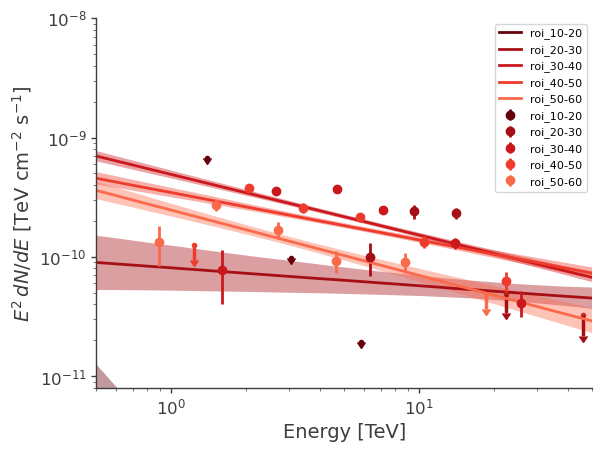

In [108]:
%matplotlib inline
import glob
gc = []
dk = []
dkf = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
ss = []
ssr= []
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[:7]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    resultdict = resultsss.get_data_frame()
    gc.append(range(15,365,10)[i])
    dk.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultdict.loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
    try:
        dkf.append(resultsall[i][2][0])
    except:
        resultfile = np.load(f"../res/{region_name}/resultsall.npy")
        dkf = resultfile[9]
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i]} #
        )
    my.Draw_spectrum_fromfile(subfolder+"Spectrum_Diffuse.txt", label=name, color=my.red_palette[-(i+1)], subplot=ax, scale=1/dkf[i])
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
results=[gc,dk,de,den,dep,di,die,dien,diep, dkf]
np.save(f"../res/{region_name}/resultsall.npy",results)
from threeML.analysis_results import AnalysisResultsSet
resultsall
rrr = [it[0][0].results for it in resultsall]
analysis_set = AnalysisResultsSet(rrr)

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band10-70.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band10-70.pdf",dpi=300)

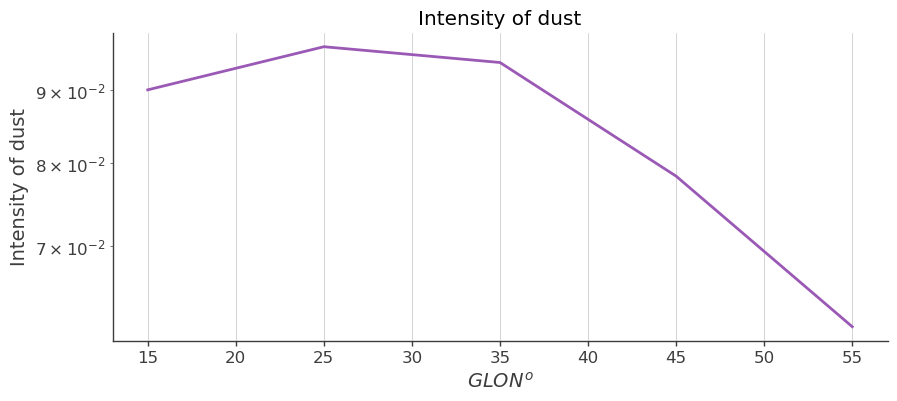

In [109]:
plt.figure(figsize=(10,4)) #
plt.plot(gc, np.array(dkf)) #np.array(den)*1e9, np.array(dep)*1e9 , fmt="o"
plt.yscale("log")
plt.title("Intensity of dust")

plt.ylabel(r"Intensity of dust")
# plt.ylim(1e-7, 1e-4)
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/dust.png",dpi=300)
plt.savefig(f"../res/{region_name}/dust.pdf",dpi=300)

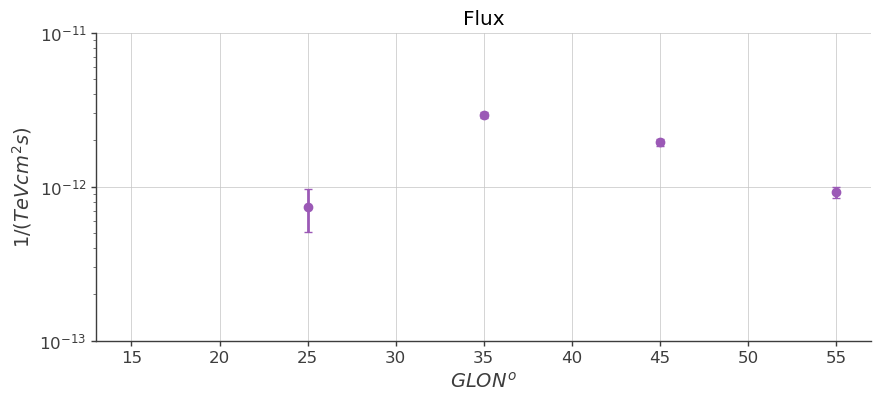

In [110]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9, [np.array(de)*1e9, np.array(de)*1e9], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-13, 1e-11)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux.pdf",dpi=300)

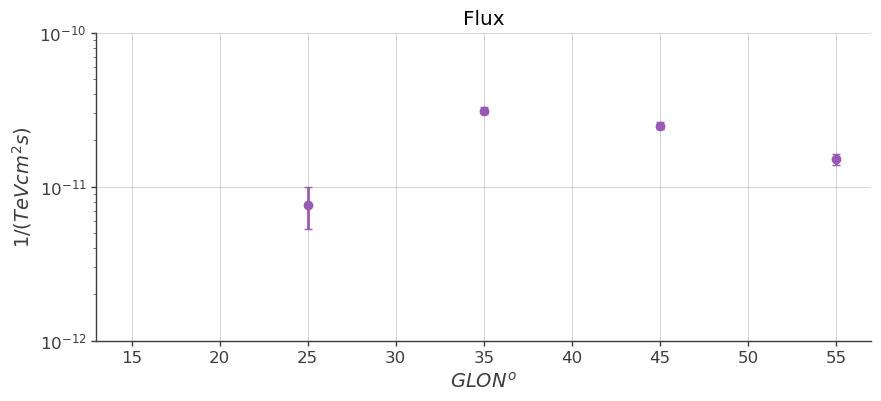

In [111]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, np.array(dk)*1e9/np.array(dkf), [np.array(de)*1e9/np.array(dkf), np.array(de)*1e9/np.array(dkf)], fmt="o", capsize=3) #np.array(den)*1e9, np.array(dep)*1e9
plt.yscale("log")
plt.title("Flux")
plt.ylim(1e-12, 1e-10)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
plt.savefig(f"../res/{region_name}/flux_fullsky.png",dpi=300)
plt.savefig(f"../res/{region_name}/flux_fullsky.pdf",dpi=300)

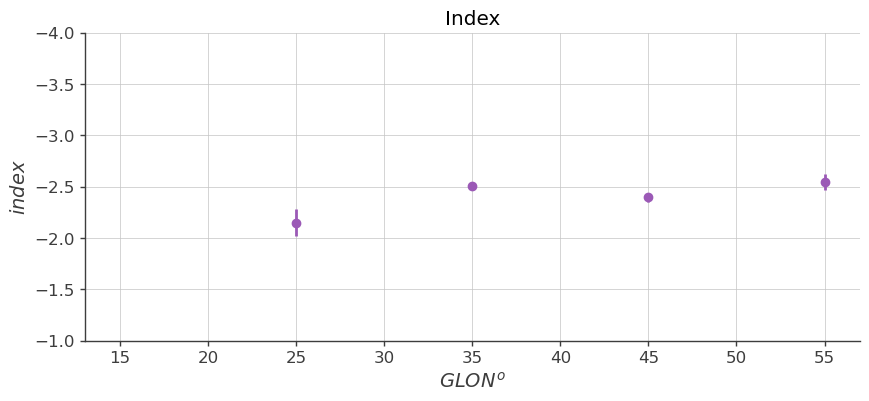

In [112]:
plt.figure(figsize=(10,4)) #
plt.errorbar(gc, di, [die, die], fmt="o") #dien, diep
plt.ylim(-1,-4)
plt.title("Index")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()
plt.savefig(f"../res/{region_name}/index.png",dpi=300)
plt.savefig(f"../res/{region_name}/index.pdf",dpi=300)

In [ ]:
%matplotlib inline
import glob
x_Max=50.
x_Min=0.5
y_Min=0.8e-11
y_Max=1e-8
fig,ax = plt.subplots()
folder_path = f"/data/home/cwy/Science/3MLWCDA/Standard/res/{region_name}"
subfolders = glob.glob(folder_path + '/**/', recursive=True)
sorted_files = sorted(subfolders[1:], key=lambda x: int(x.split('_')[-1].split('-')[-2]))
# 打印所有找到的子文件夹路径
for i,subfolder in enumerate(sorted_files[6:14]):
    name = subfolder.split("/")[-2]
    print(name)
    specpath = subfolder+"Results.fits"
    resultsss = load_analysis_results(specpath)
    # try:
    plot_spectra(
        resultsss,
        sources_to_use=["Diffuse"],
        include_extended=True,
        ene_min=x_Min,
        ene_max=x_Max,
        num_ene=30,
        energy_unit="TeV",
        flux_unit=f"TeV/(s cm2)", #*
        subplot=ax,
        plot_style_kwargs={"label":name, "color":my.red_palette[-(i+1)], "scale":1/dkf[i+6]} #
        )
    # except Exception as e:
    #     print(f"Error: {e}")
    #     continue
    

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
ax.legend()
plt.savefig(f"../res/{region_name}/spectrum_band70-150.png",dpi=300)
plt.savefig(f"../res/{region_name}/spectrum_band70-150.pdf",dpi=300)